In [ ]:
import pickle
from neuron_visualization.NeuronVisualizer import NeuronVisualizer
import pandas as pd

env_type = "square"

with open(f"models/rnn_{env_type[0:2]}_model.pkl", "rb") as f:
    model = pickle.load(f)
model.set_device("cpu")
visualizer = NeuronVisualizer(model)
data = pd.read_csv(f"data/{env_type}_1000traj_50steps.csv")
visualizer.retrieve_activations(data, use_predicted=True)

100%|██████████| 1000/1000 [00:13<00:00, 76.55it/s]


100%|██████████| 100/100 [00:03<00:00, 32.30it/s]


Cluster 0: [ 0  5  6  7 13 17 23 26 29 30 32 33 35 38 42 45 46 56 60 62 66 67 68 70
 72 73 75 79 81 86 88 95 99]


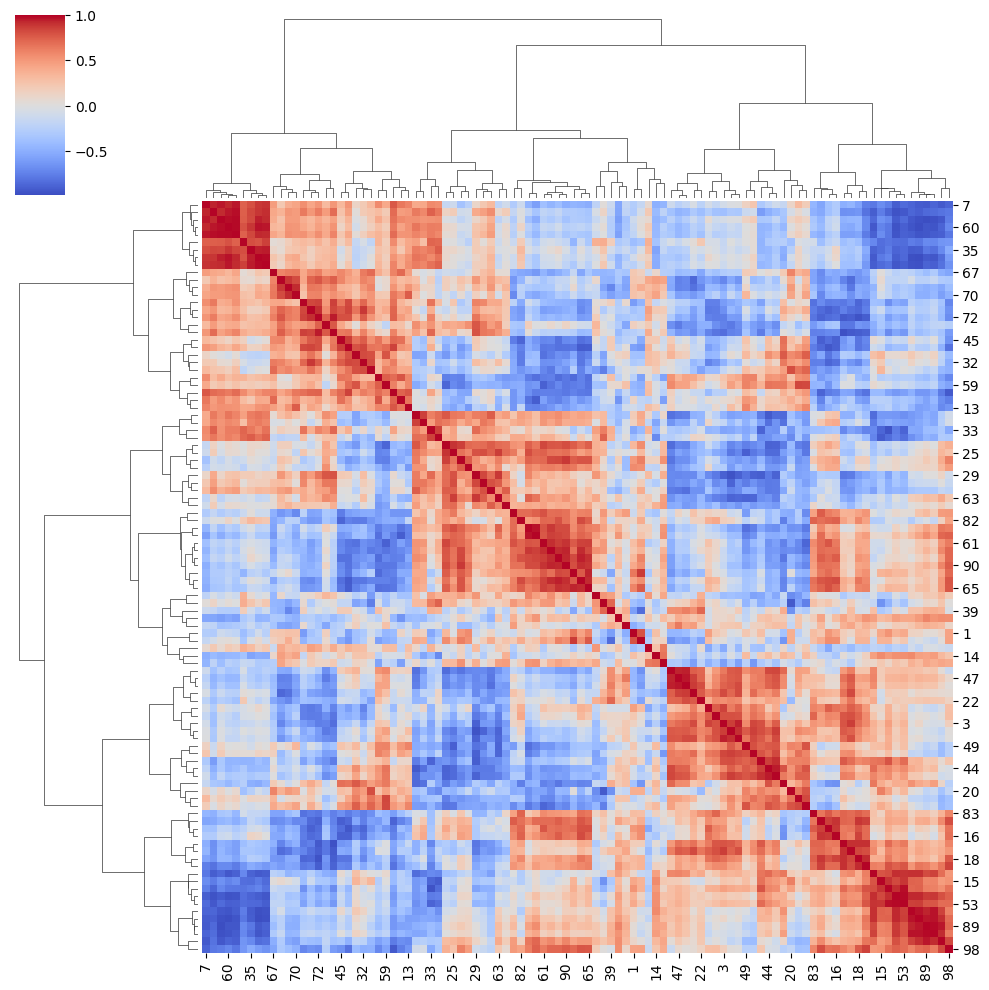

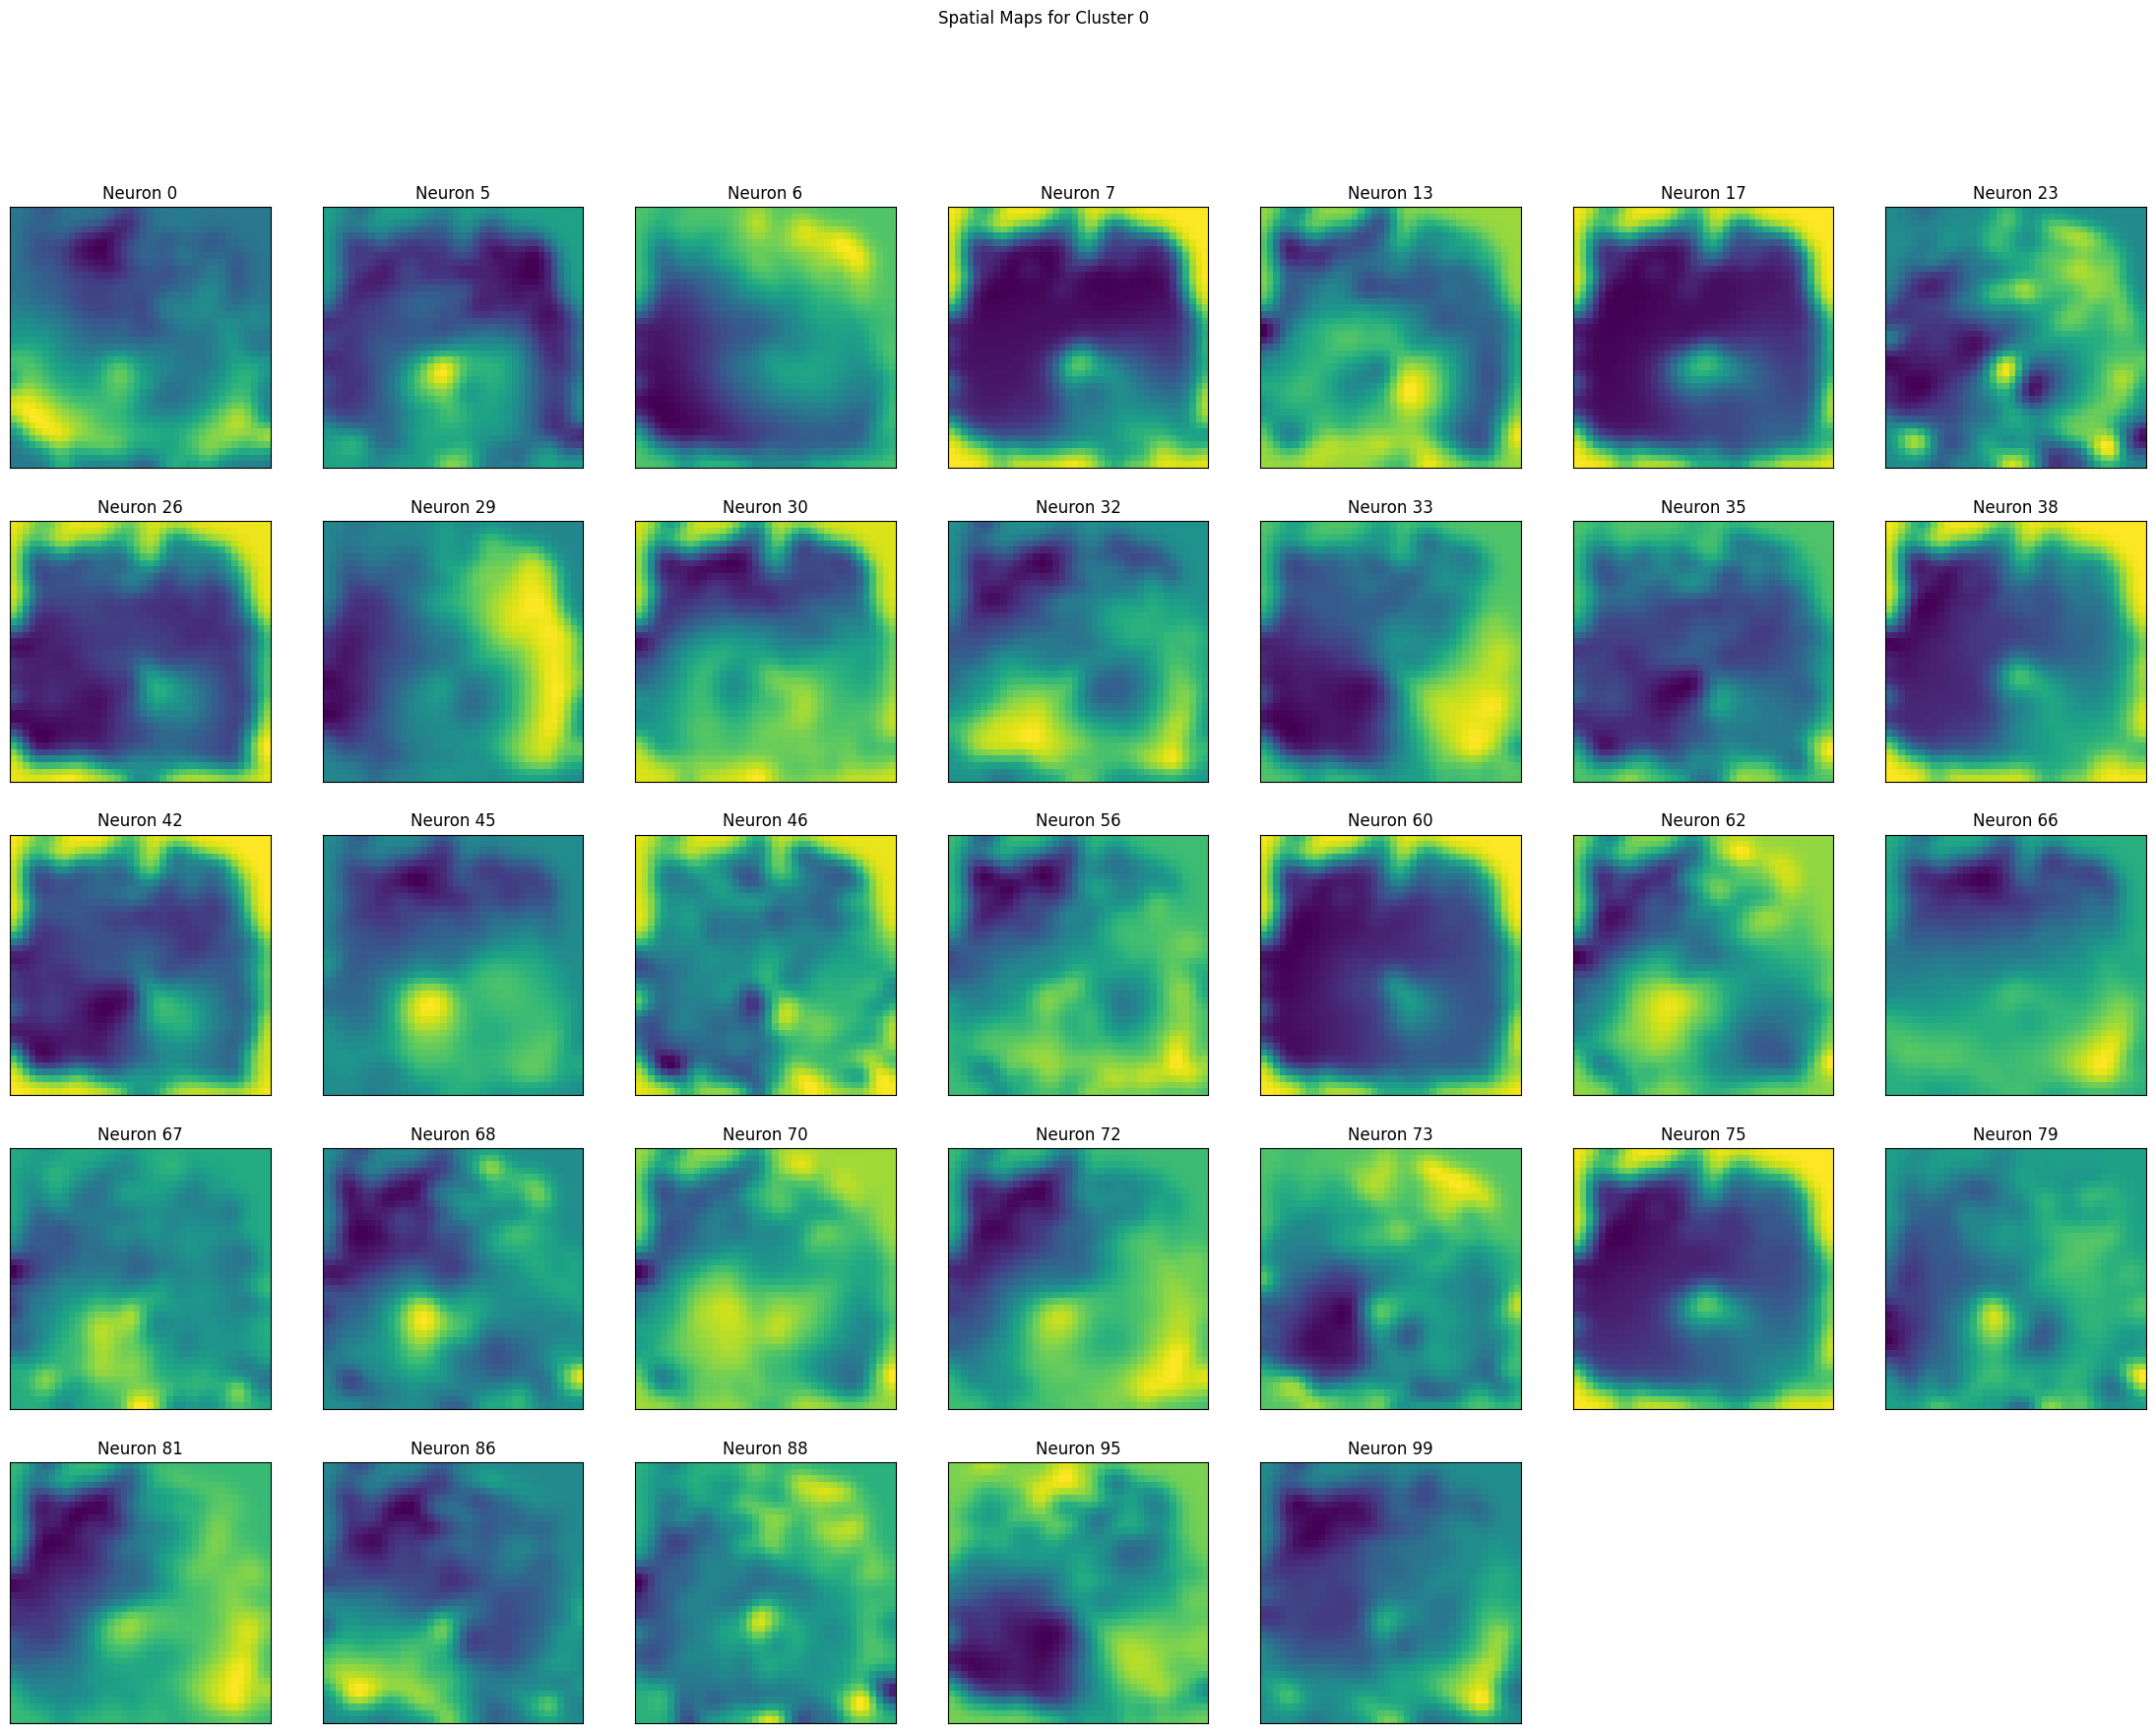

Cluster 1: [ 4 10 12 15 16 18 21 34 39 41 50 53 58 76 77 80 83 84 89 93 94 96 97 98]


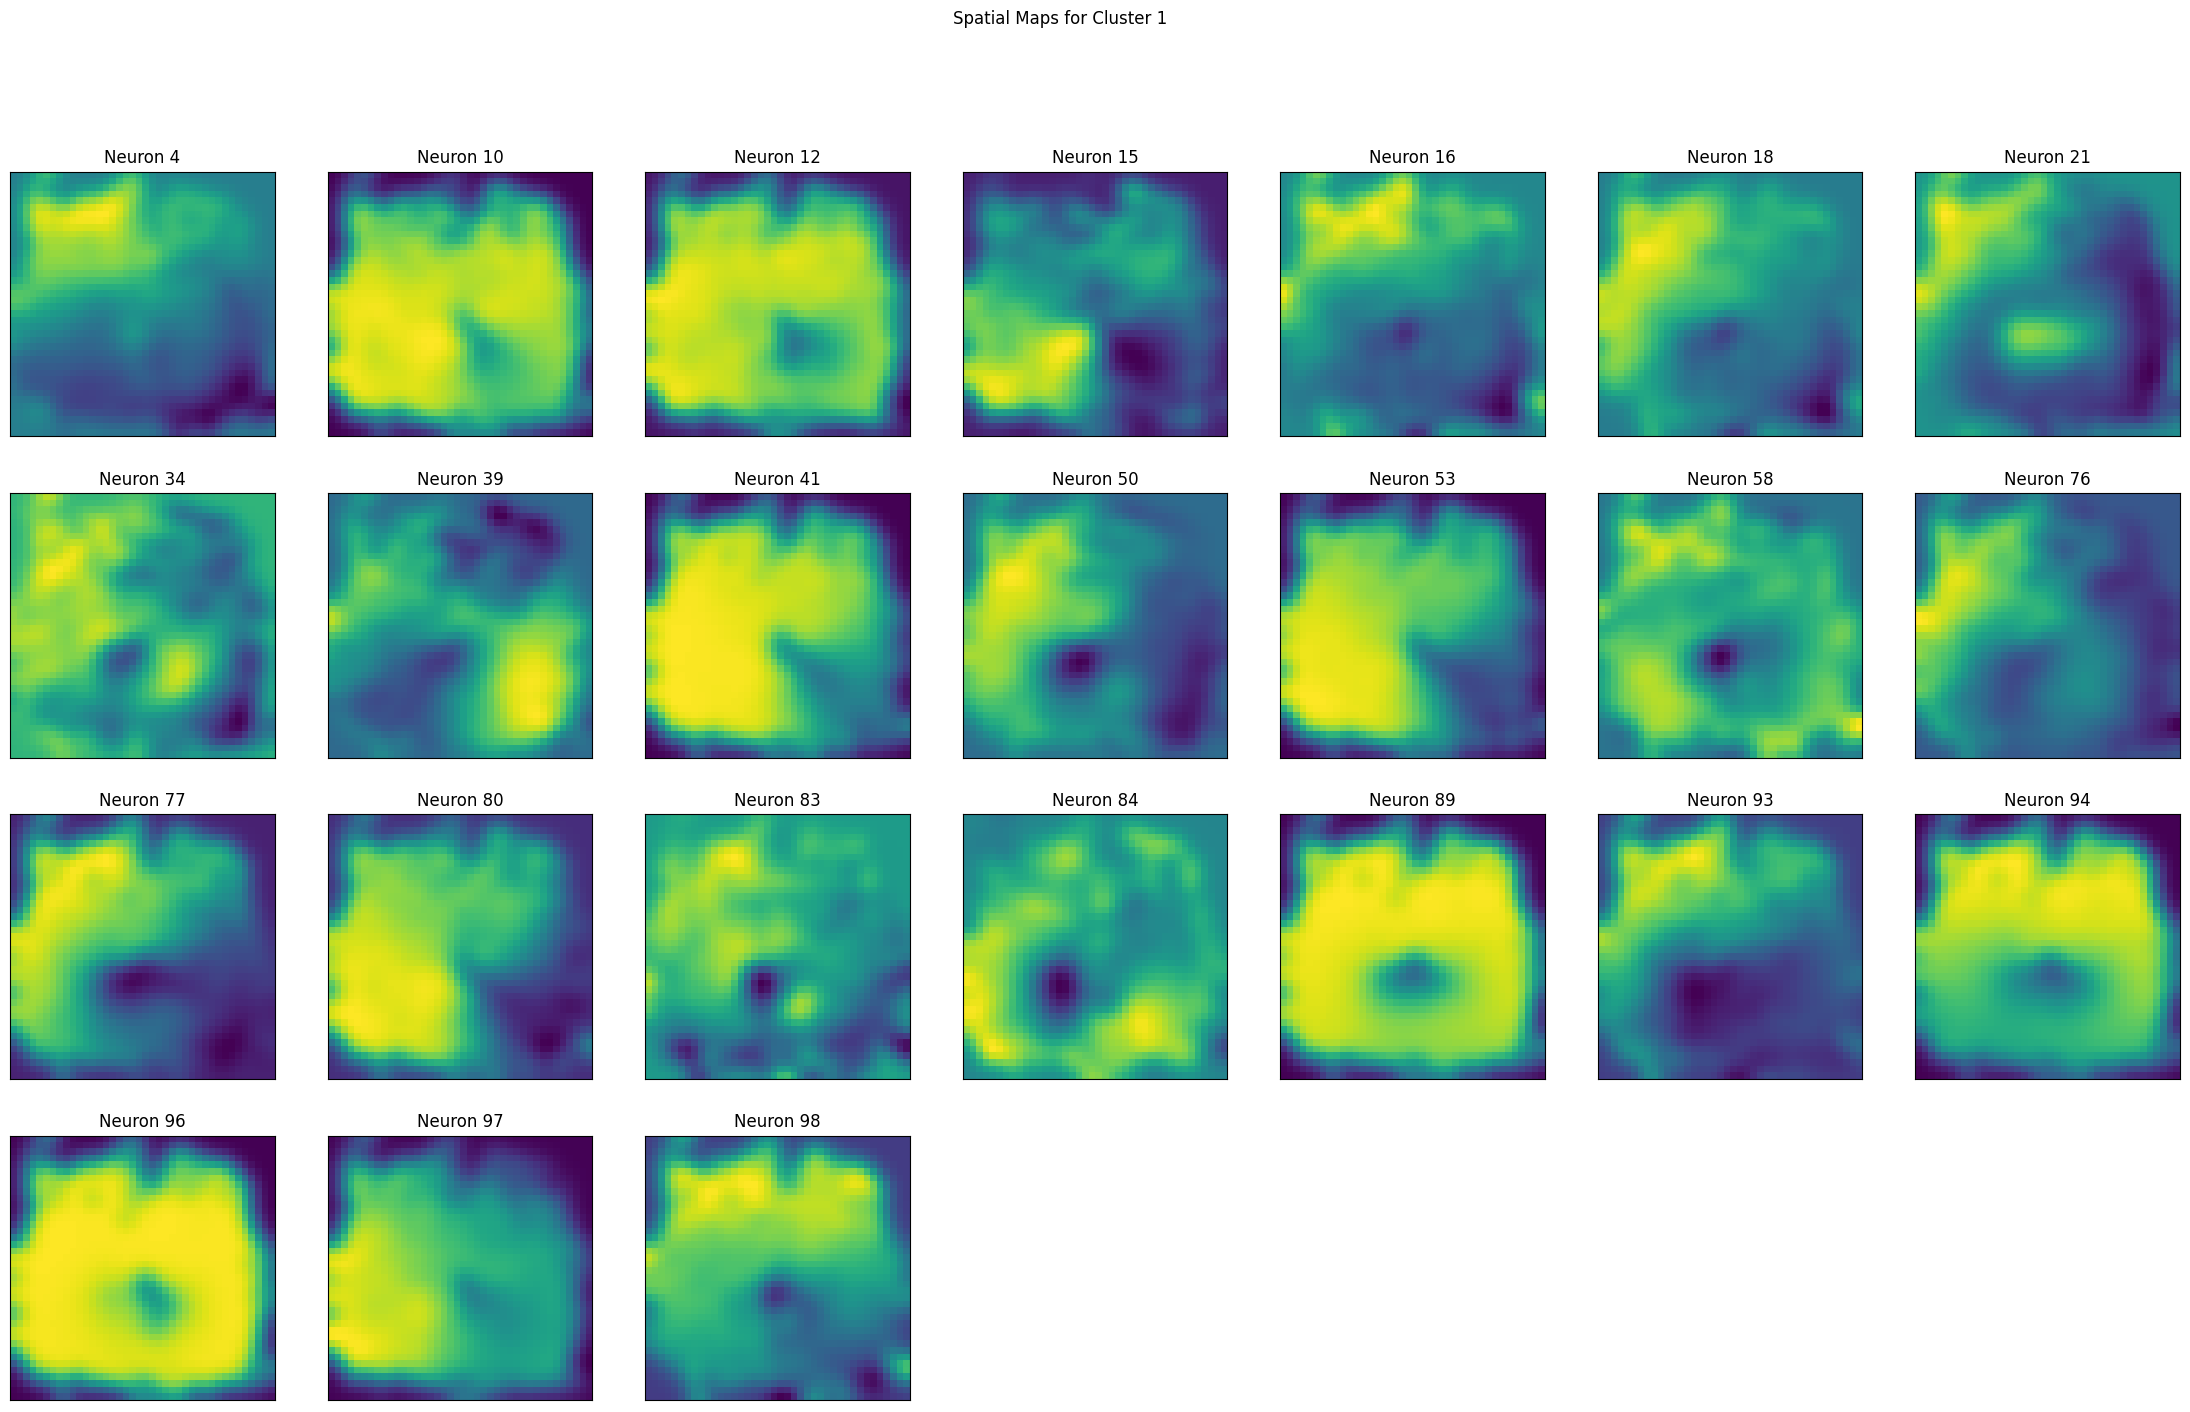

Cluster 2: [ 3  8  9 11 20 22 27 28 36 40 44 47 48 49 59 69 78 85 91]


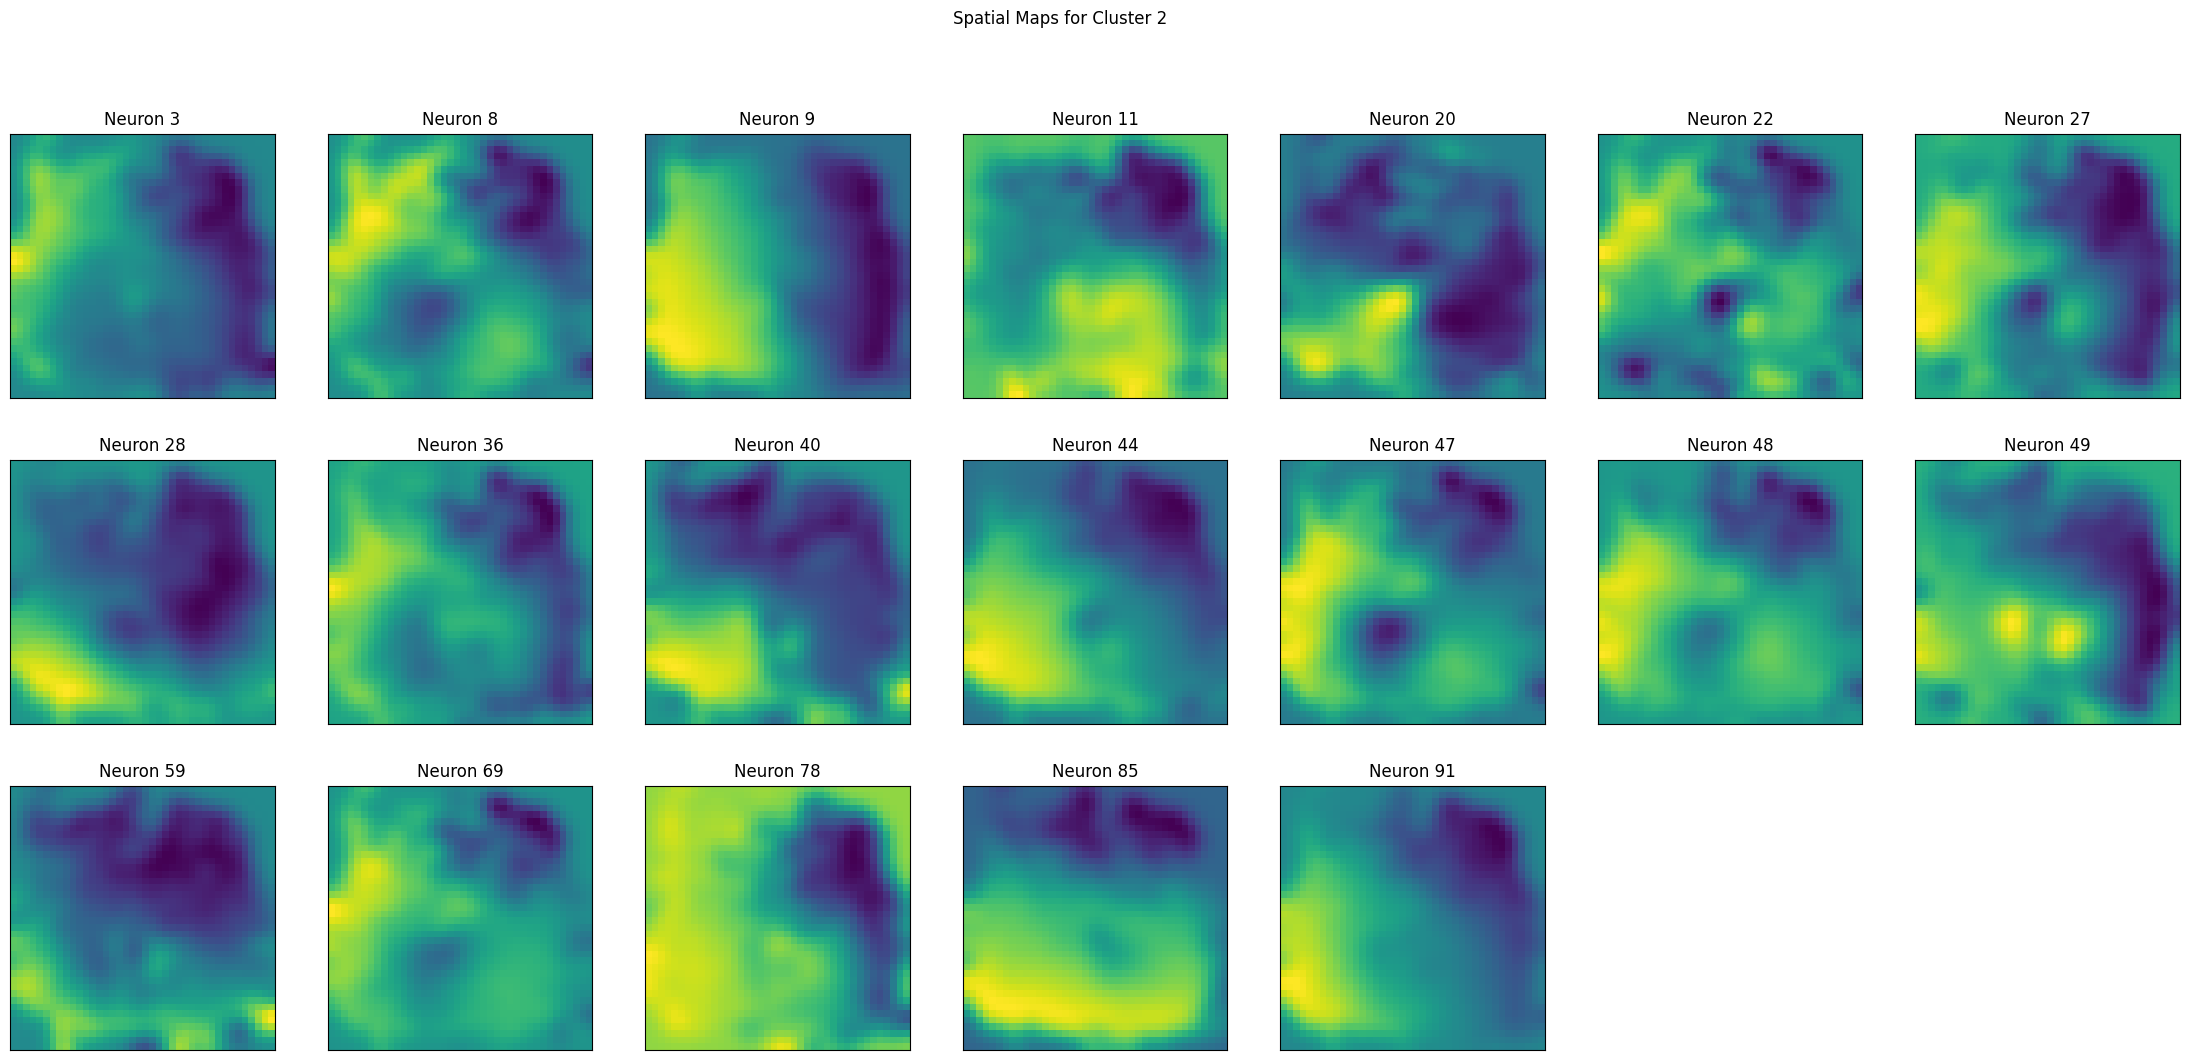

Cluster 3: [ 1  2 19 24 25 31 43 51 54 55 57 61 63 64 65 71 74 82 87 90 92]


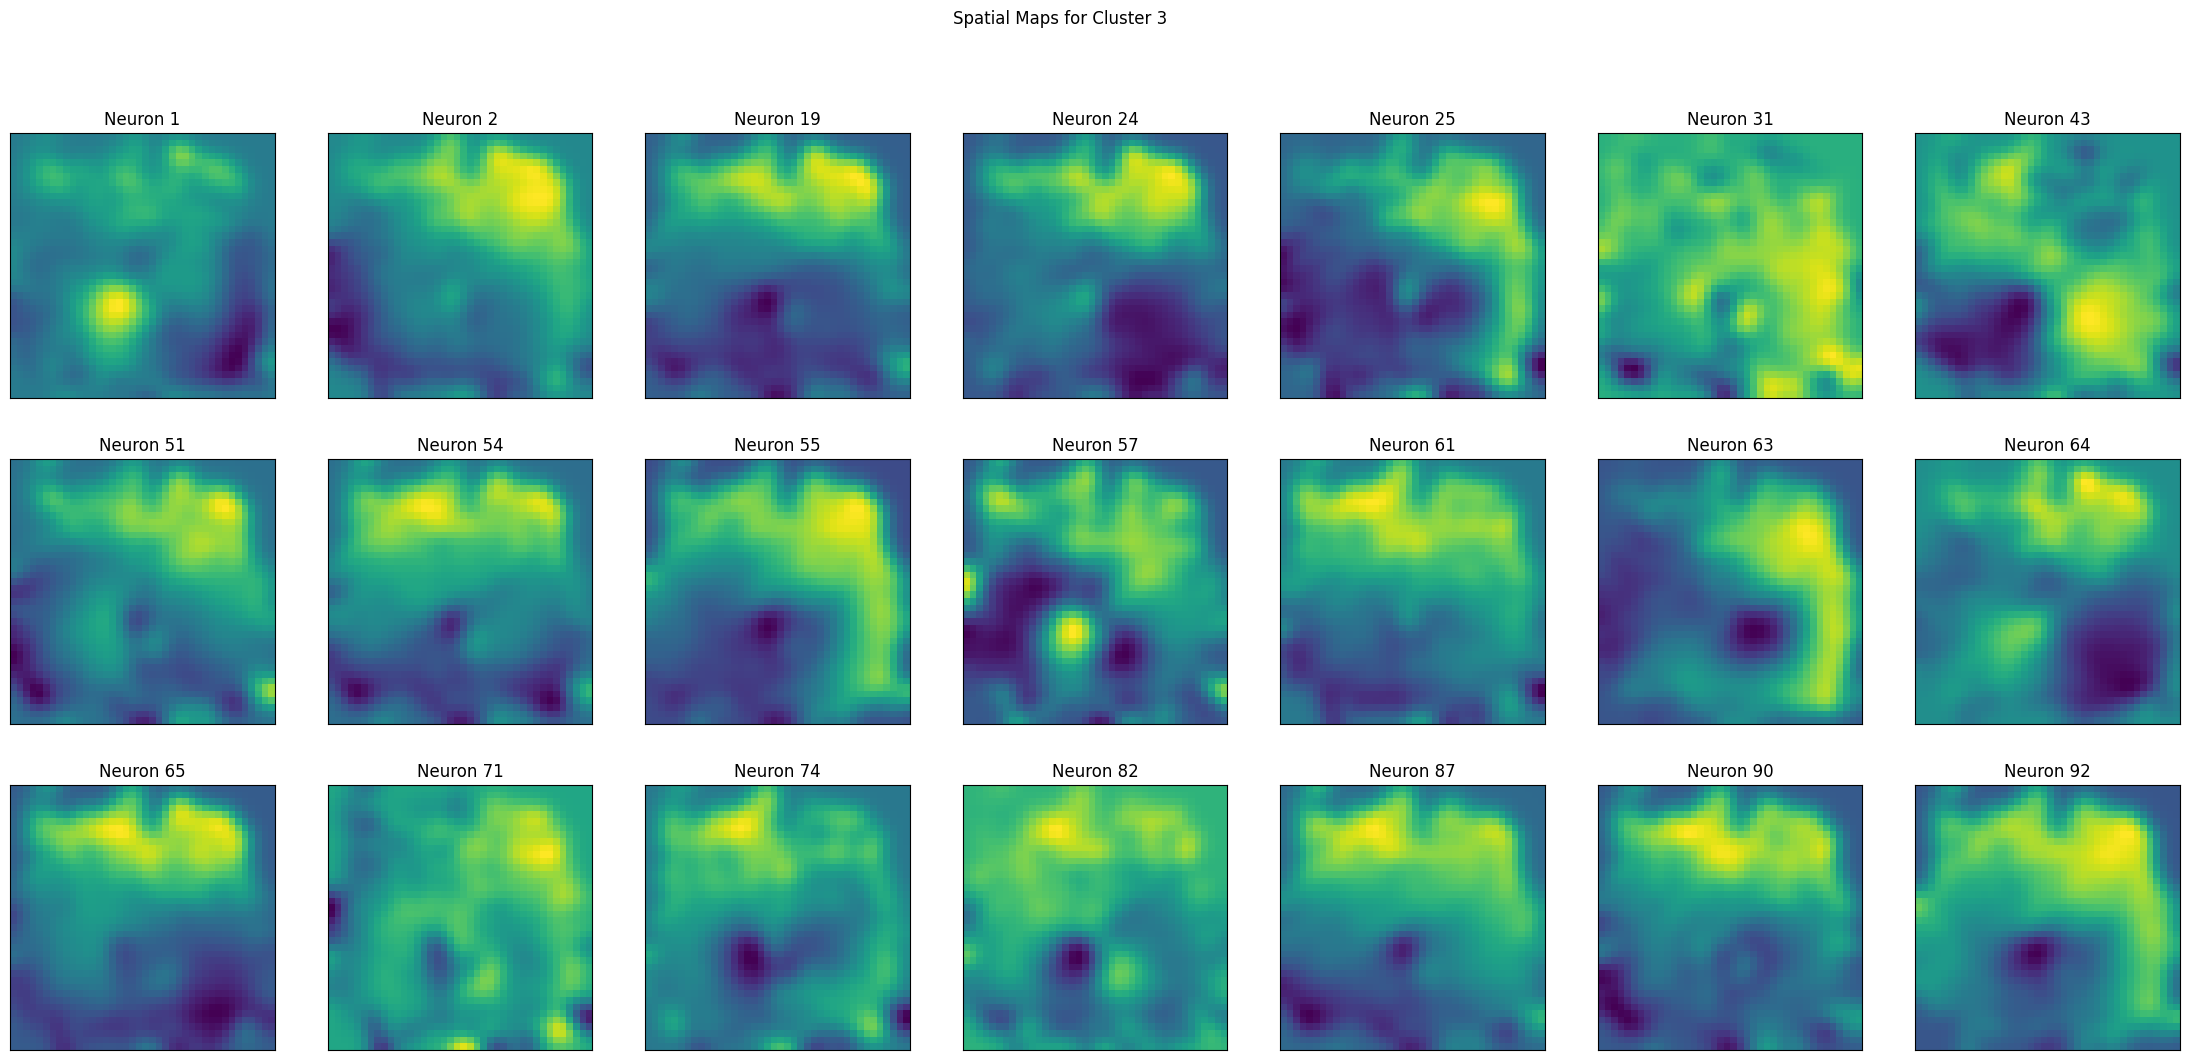

Cluster 4: [14 37 52]


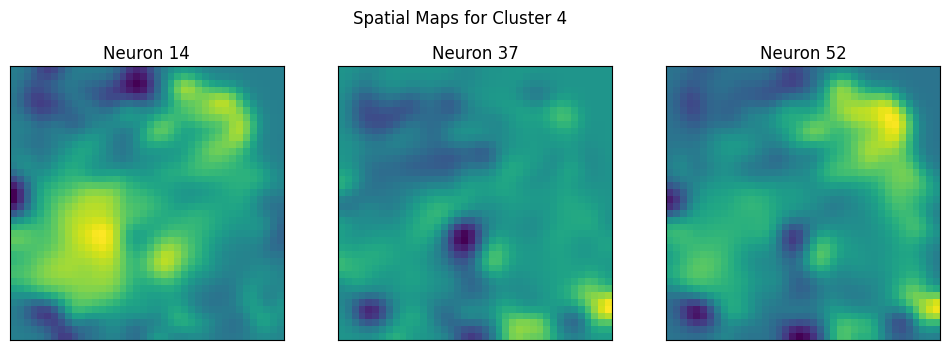

In [3]:
from matplotlib import pyplot as plt
import numpy as np
from utils.plots import smart_subplots
maps = visualizer.get_spatial_maps(absolute=False)
cos_sims = visualizer.compute_cos_sim_on_maps(maps)

import seaborn as sns
import scipy.cluster.hierarchy as sch

linkage = sch.linkage(1 - cos_sims, method='ward')
sns.clustermap(cos_sims, row_linkage=linkage, col_linkage=linkage, cmap='coolwarm', center=0)

# cluster the resulting cells into 5 clusters
from sklearn.cluster import AgglomerativeClustering
num_clusters = 5
clustering = AgglomerativeClustering(n_clusters=num_clusters, linkage='average')
labels = clustering.fit_predict(1 - cos_sims)
for cluster_id in range(num_clusters):
    cluster_indices = np.where(labels == cluster_id)[0]
    print(f"Cluster {cluster_id}: {cluster_indices}")
    fig, axes = smart_subplots(len(cluster_indices), 7)
    axes = np.array(axes).ravel()
    for ax in axes:
        ax.set_xticks([])
        ax.set_yticks([])
        ax.set_xticklabels([])
        ax.set_yticklabels([])
    for i, neuron_idx in enumerate(cluster_indices):
        axes[i].imshow(maps[neuron_idx], cmap='viridis')
        axes[i].set_title(f'Neuron {neuron_idx}')
    plt.suptitle(f'Spatial Maps for Cluster {cluster_id}')
    plt.show()

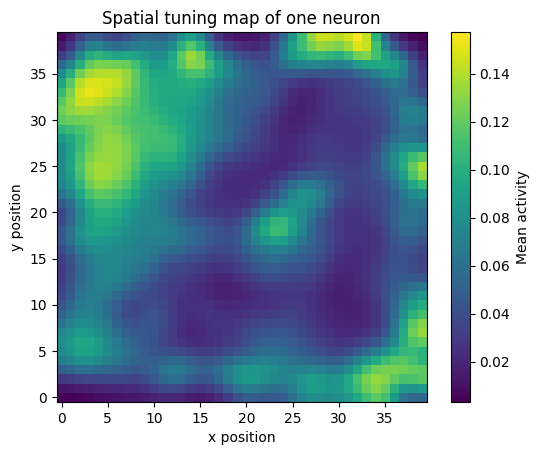

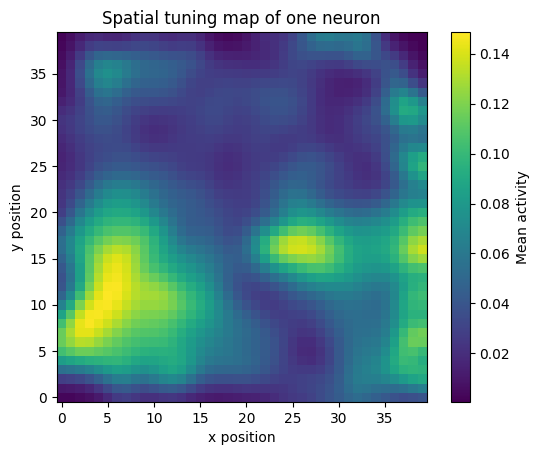

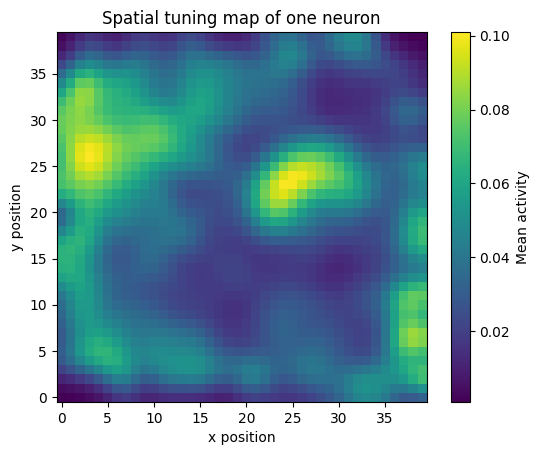

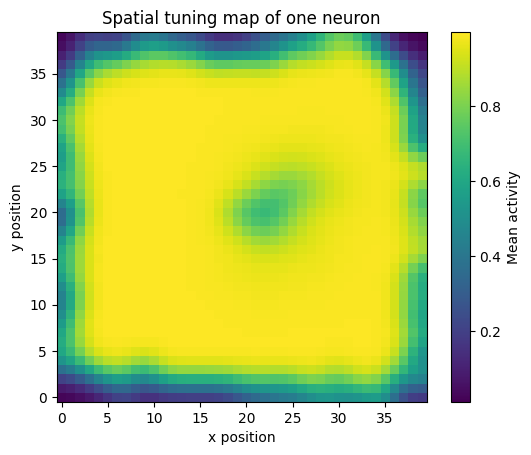

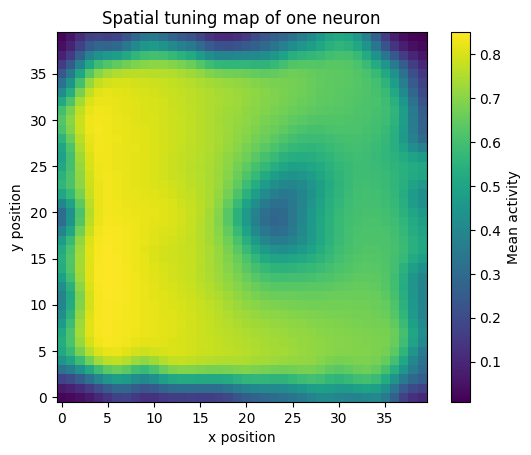

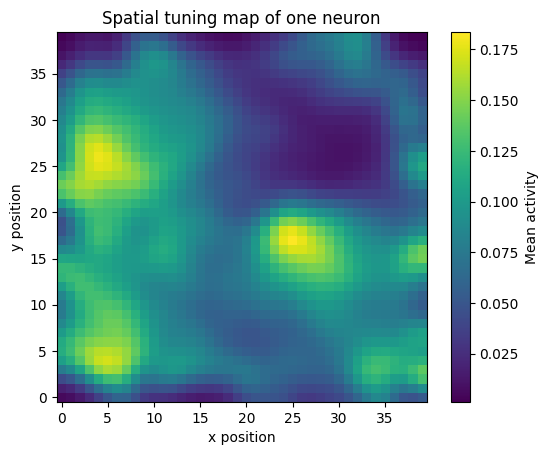

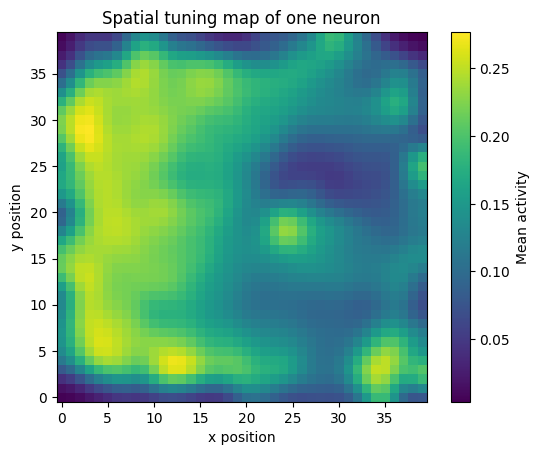

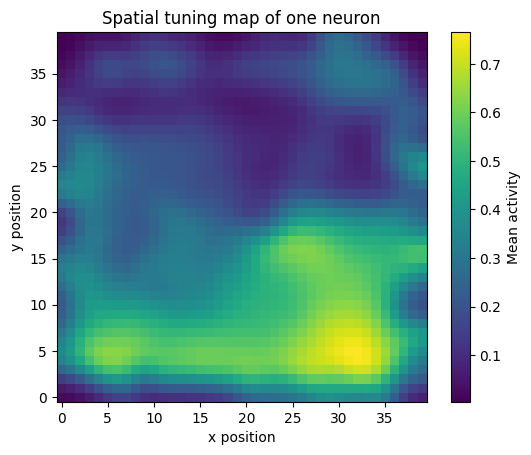

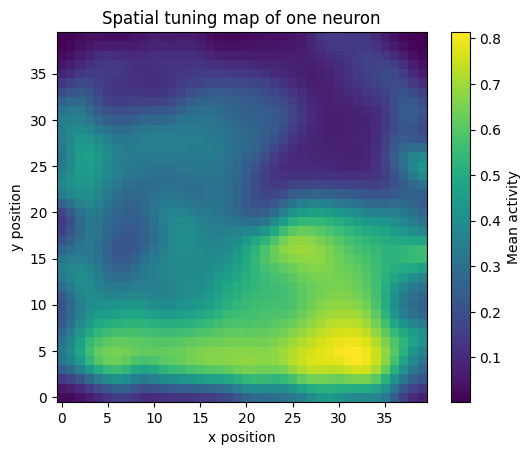

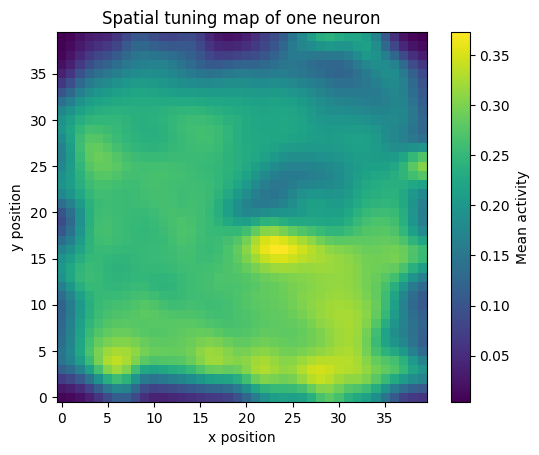

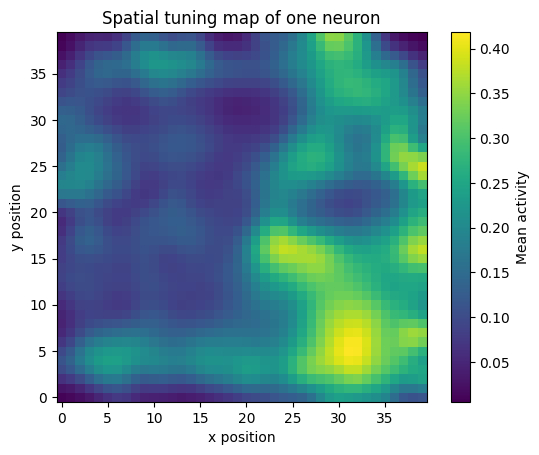

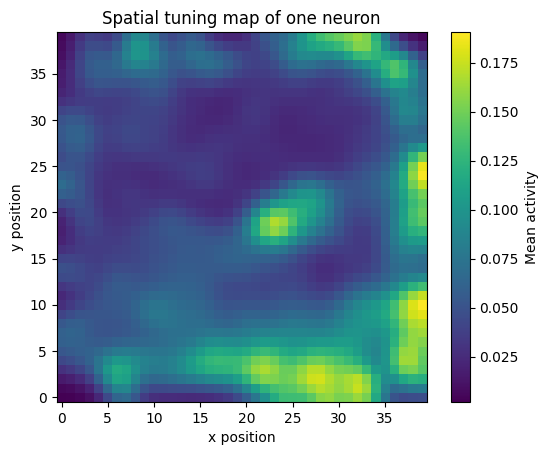

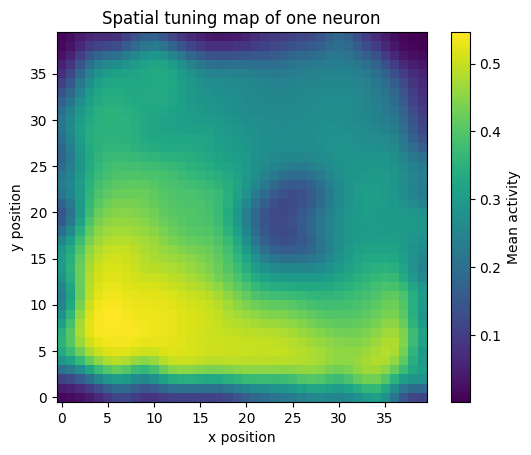

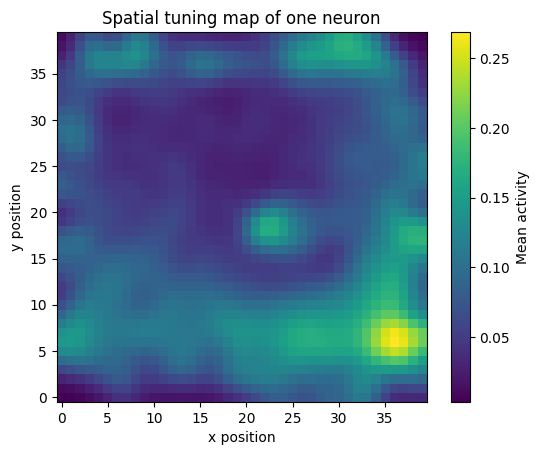

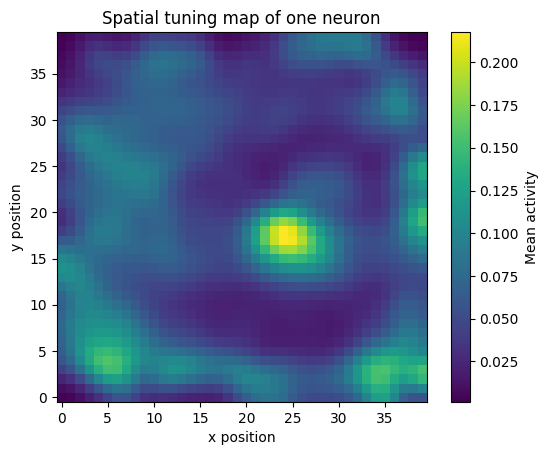

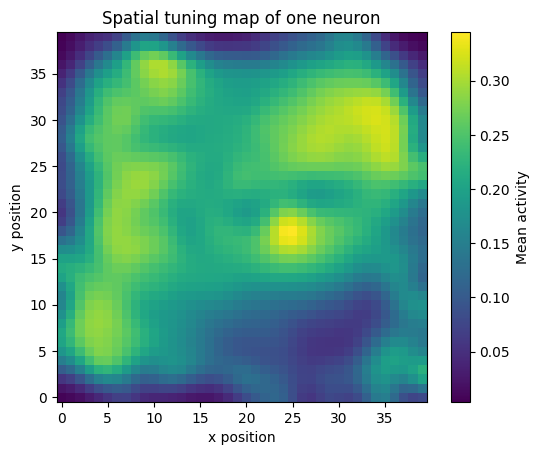

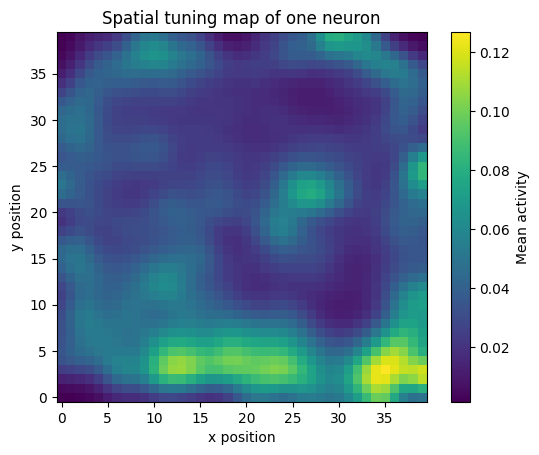

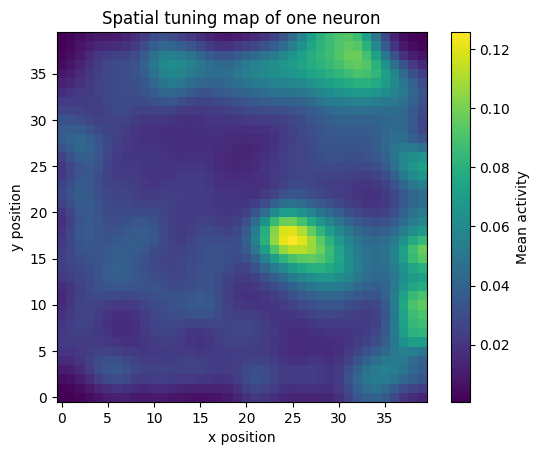

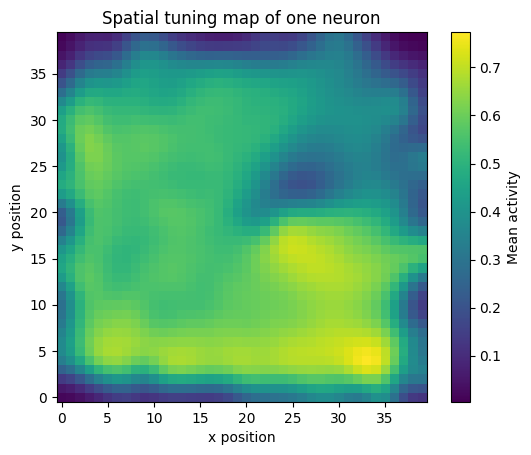

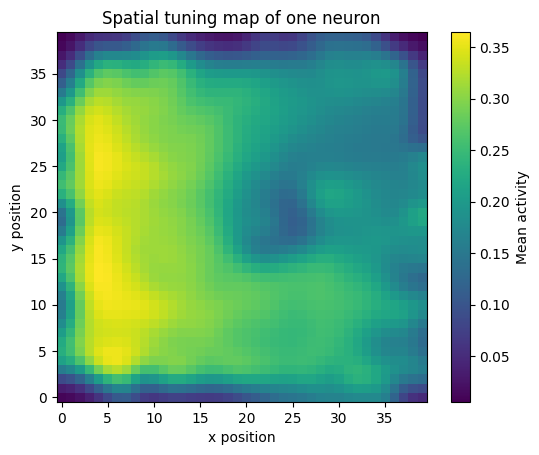

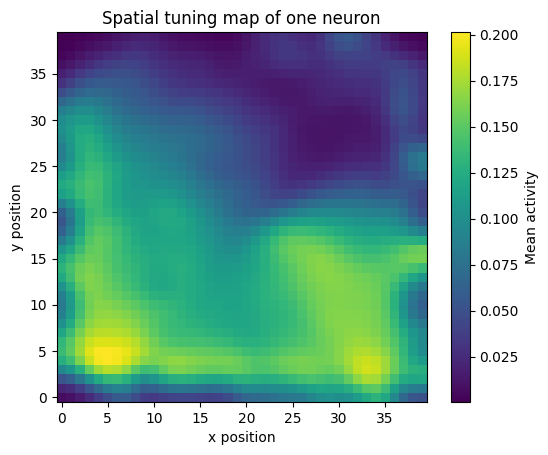

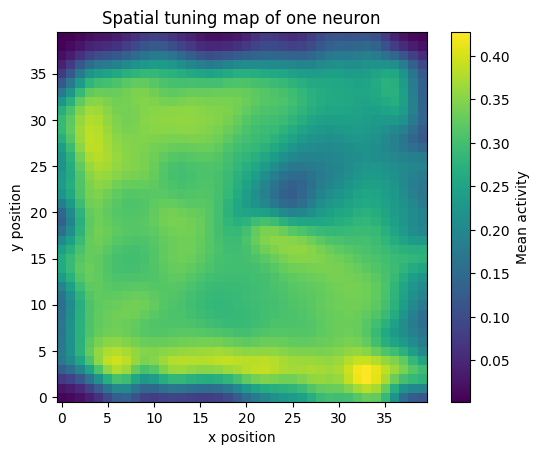

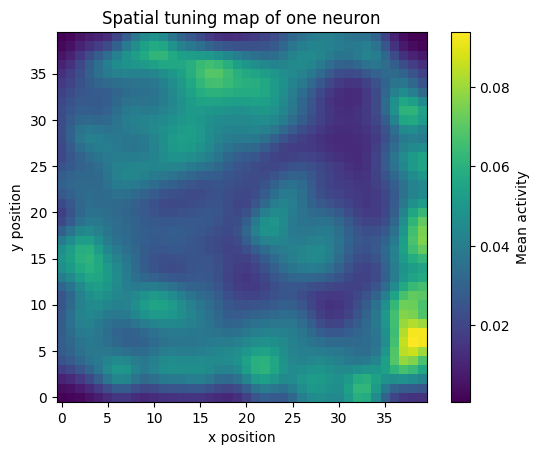

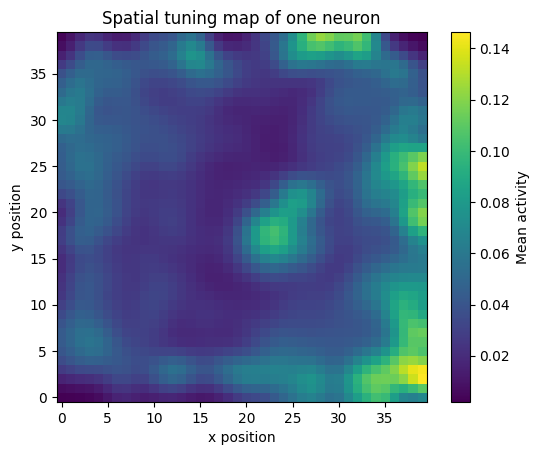

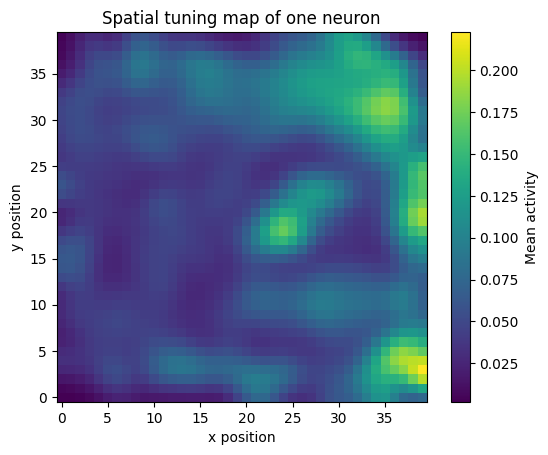

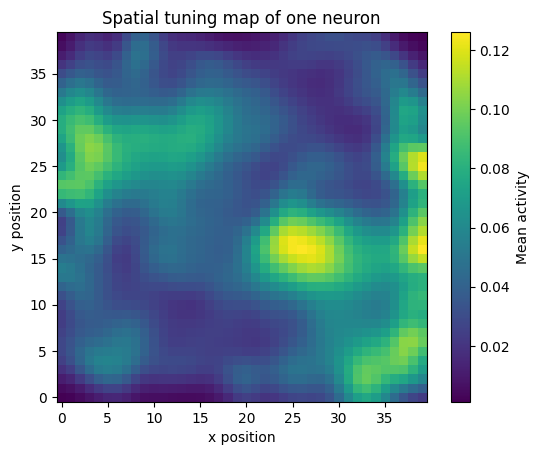

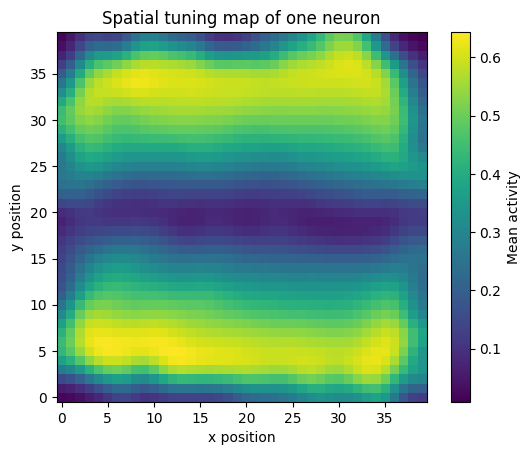

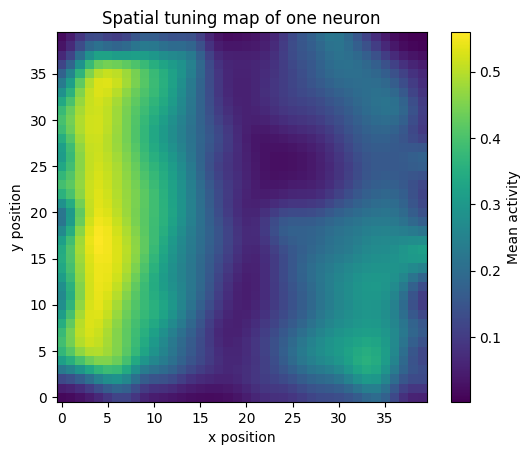

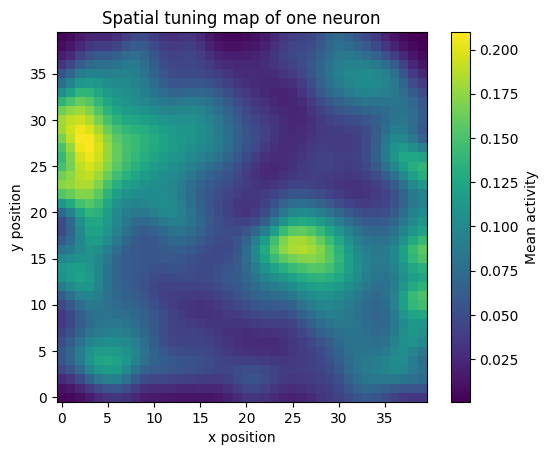

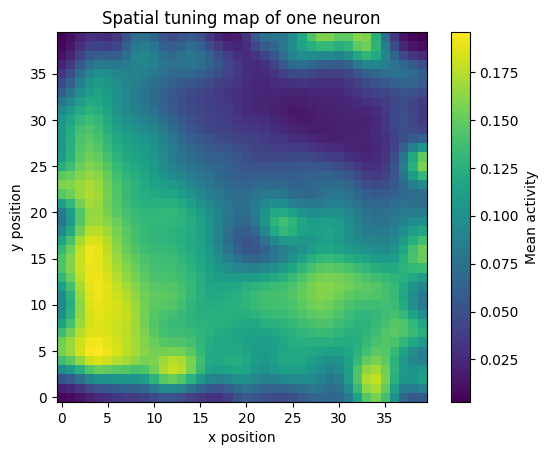

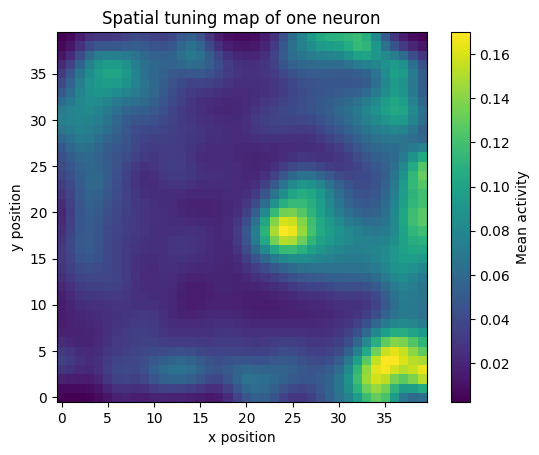

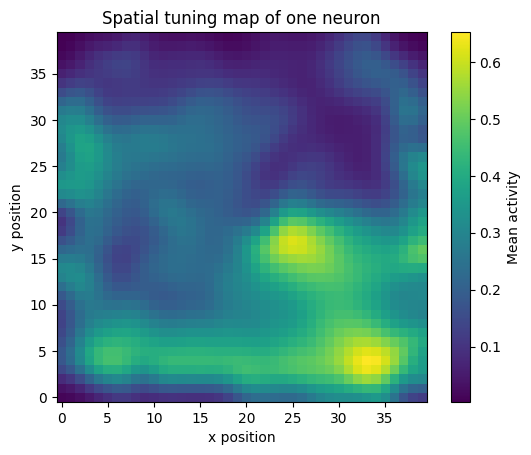

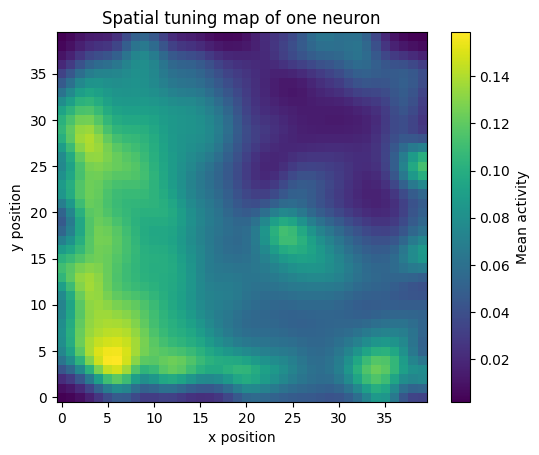

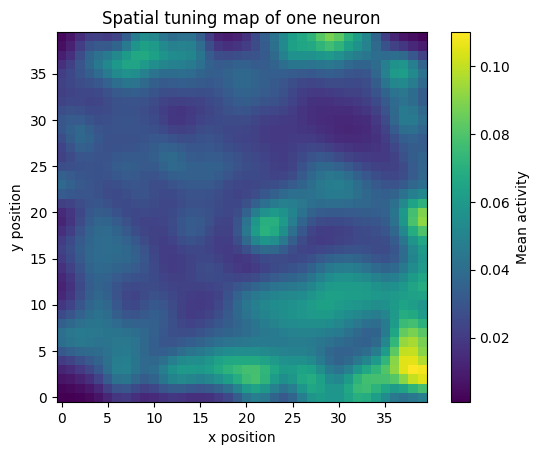

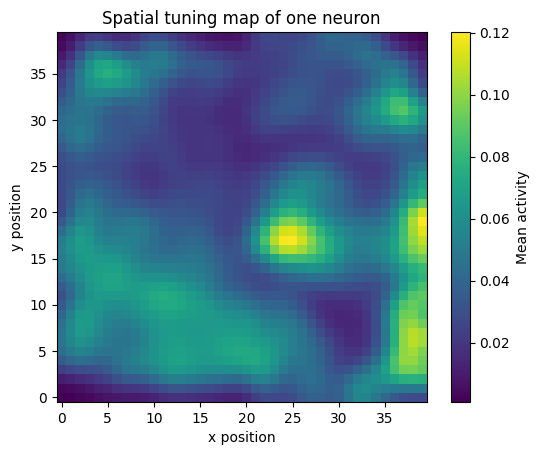

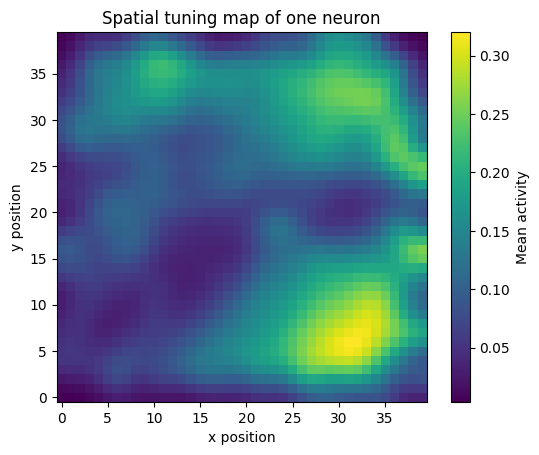

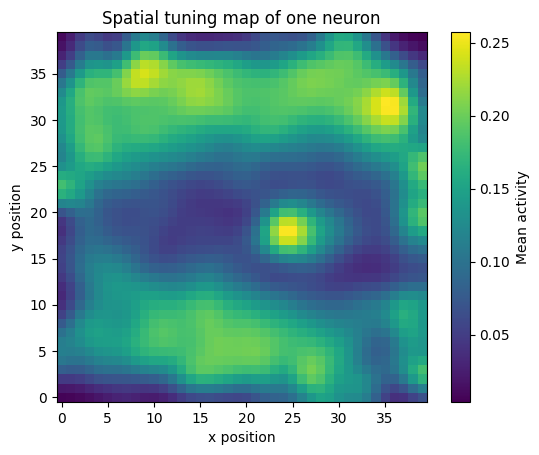

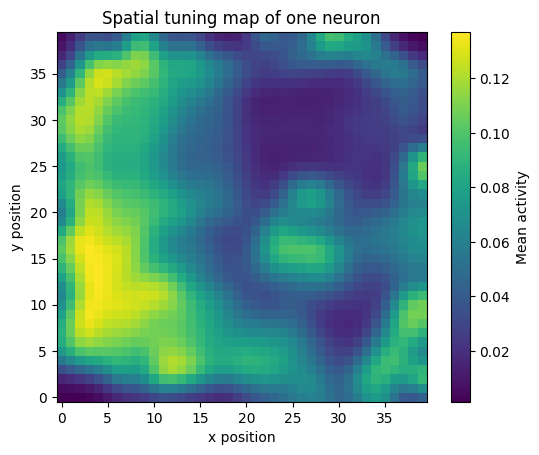

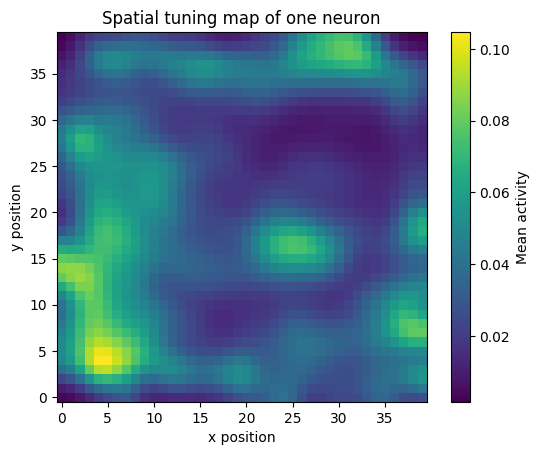

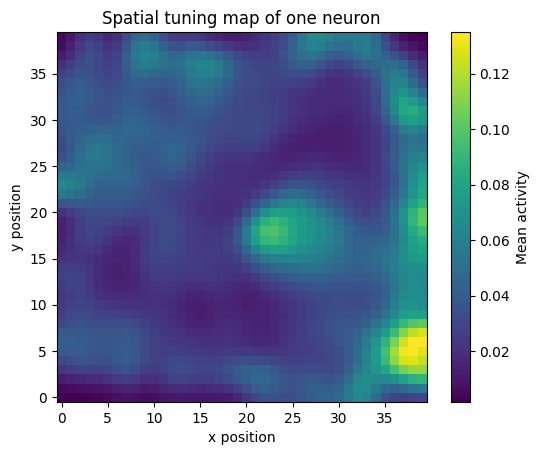

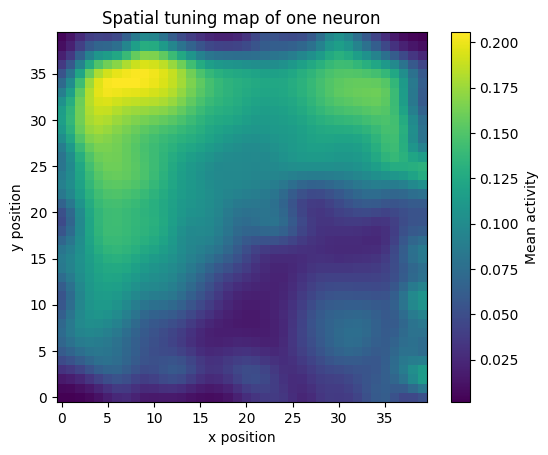

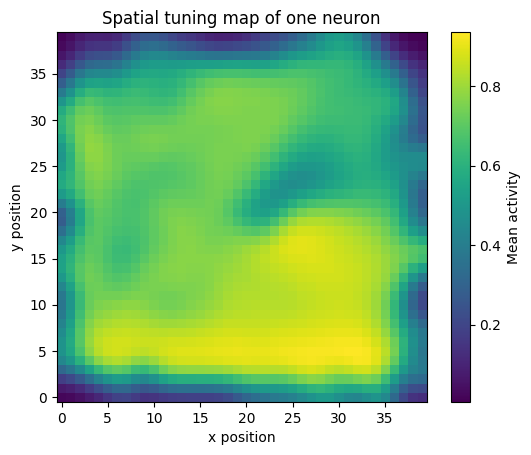

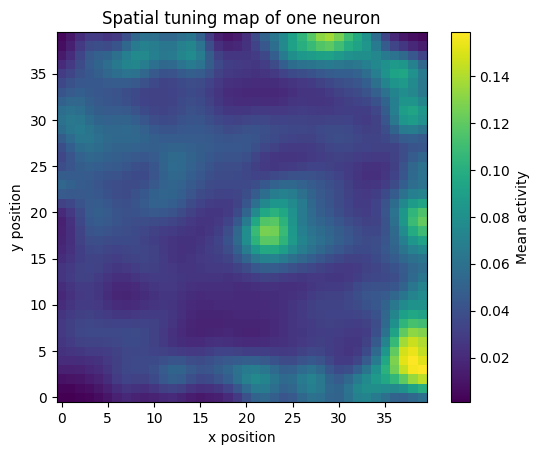

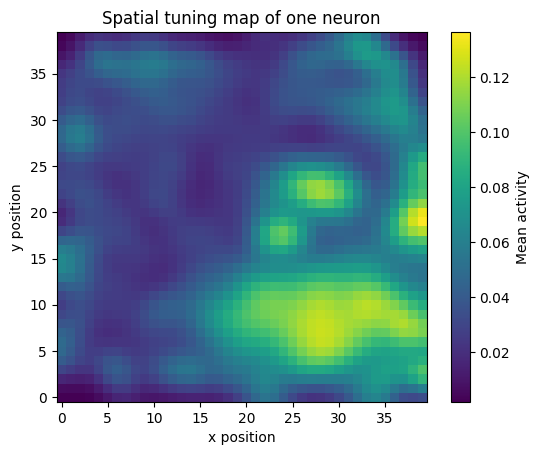

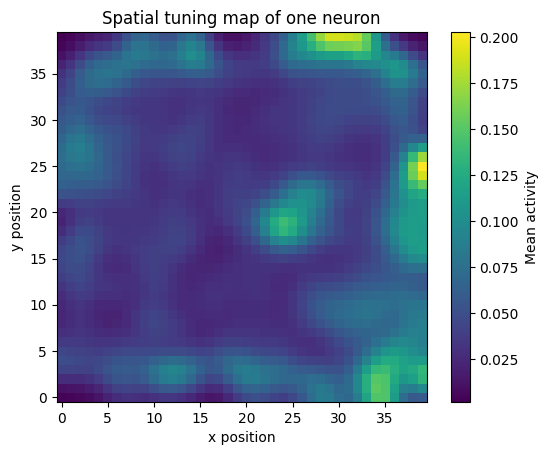

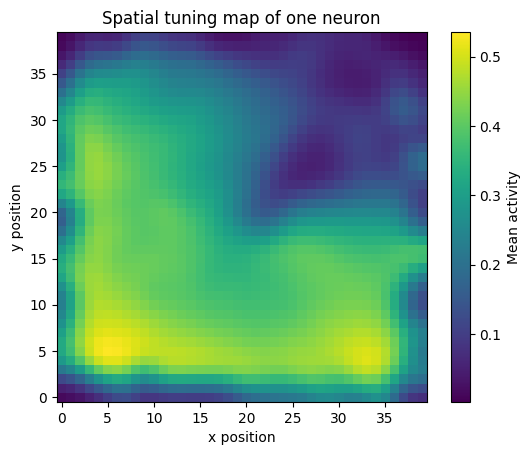

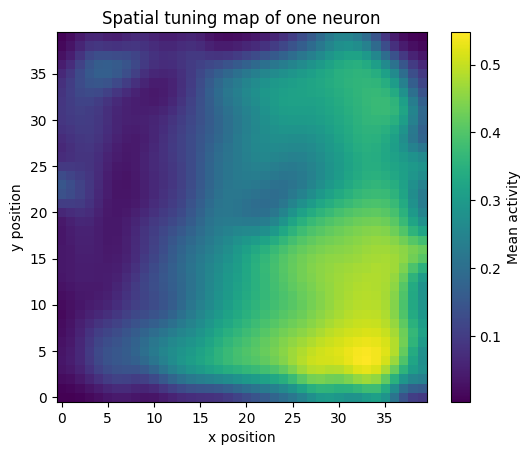

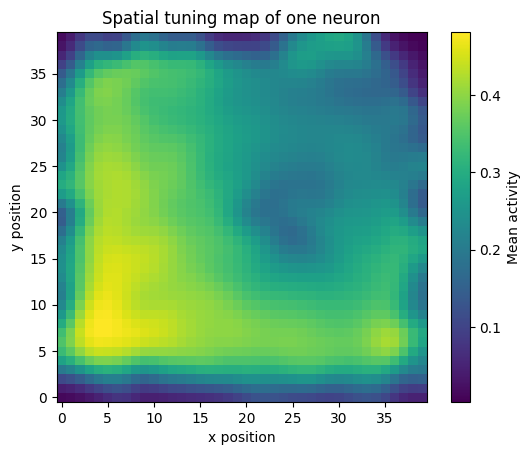

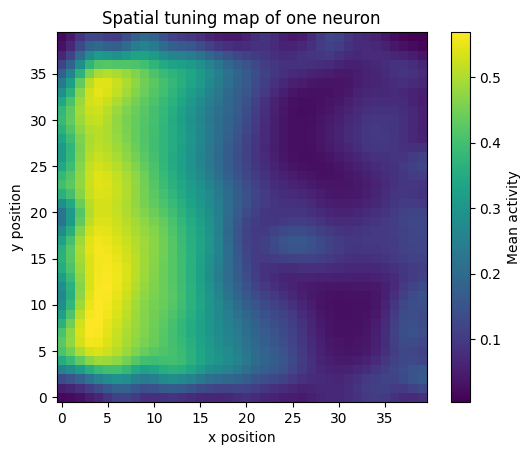

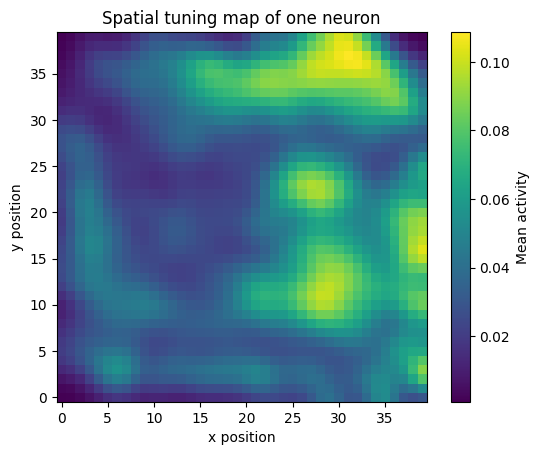

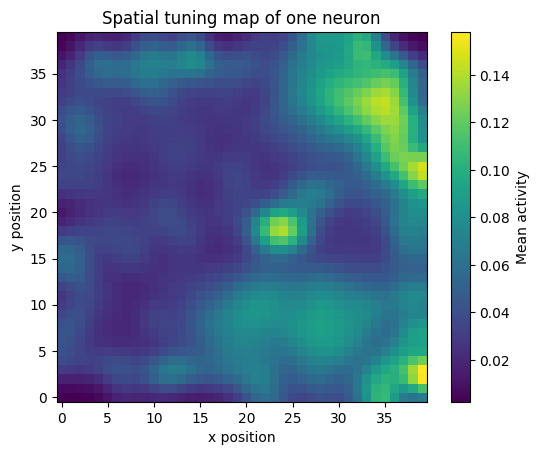

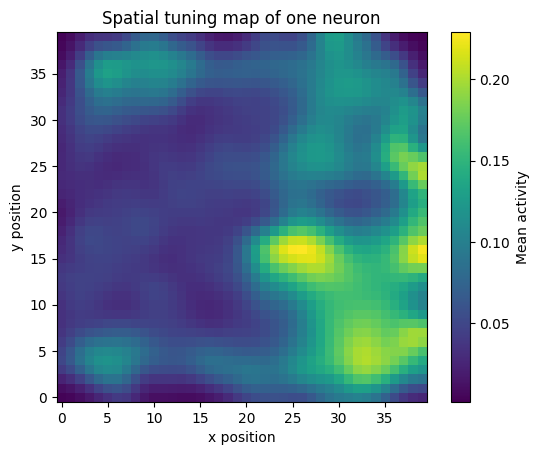

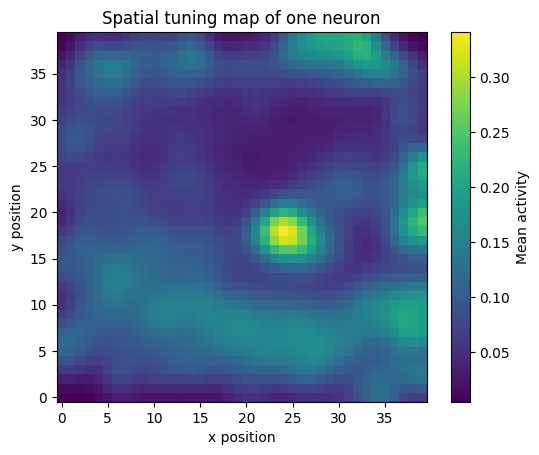

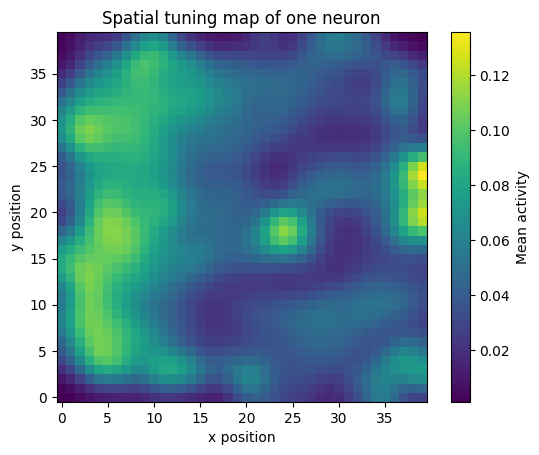

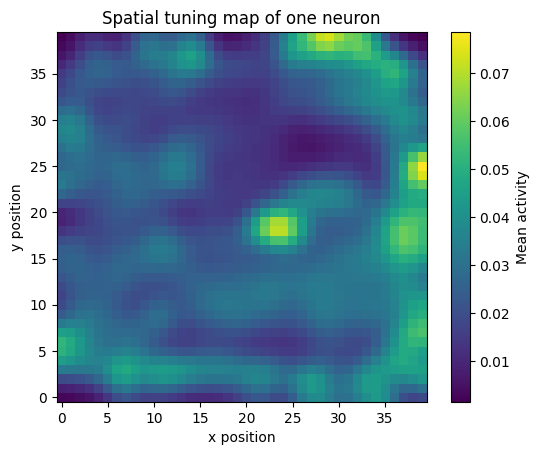

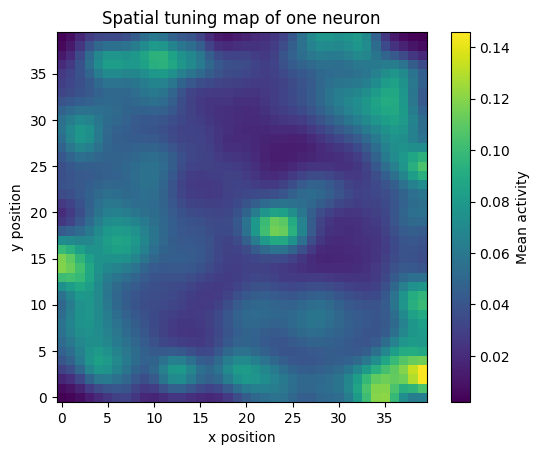

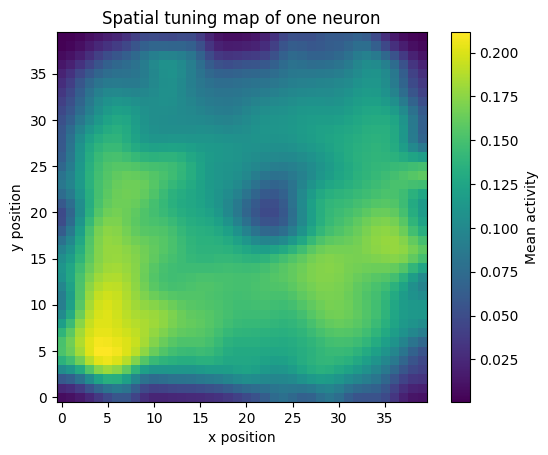

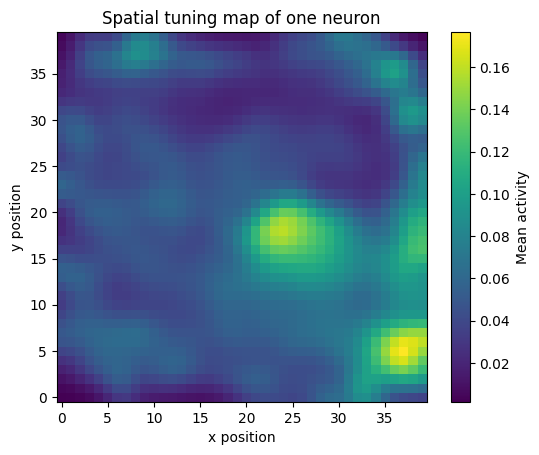

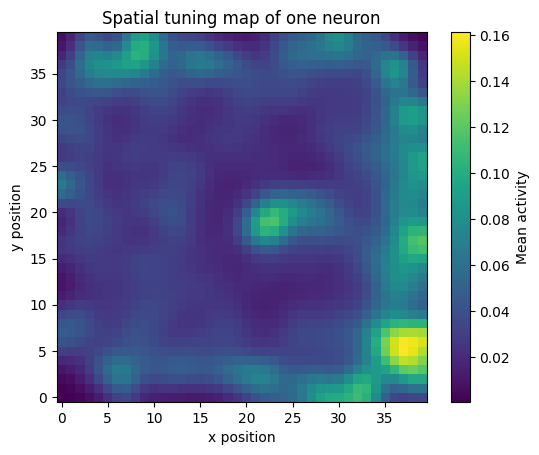

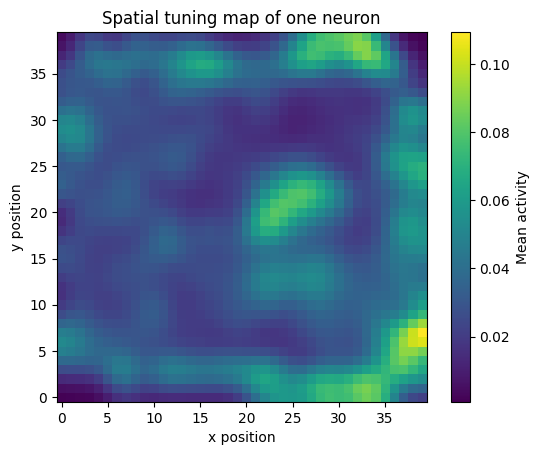

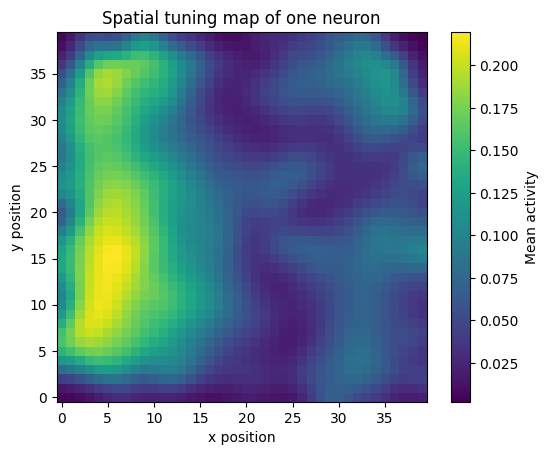

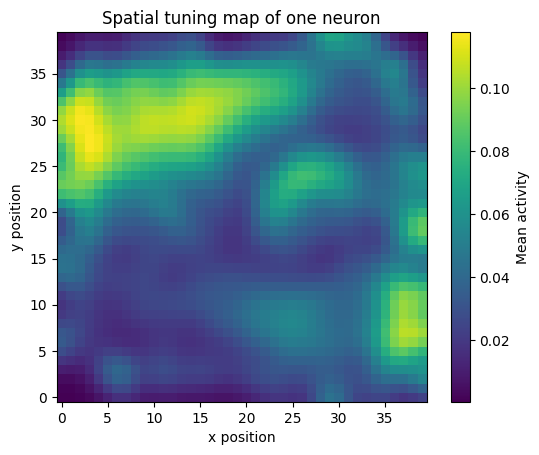

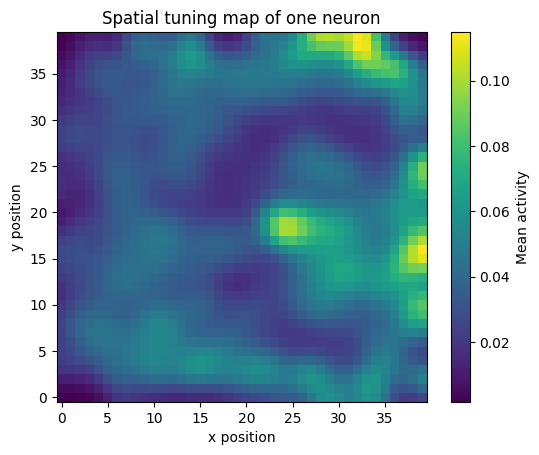

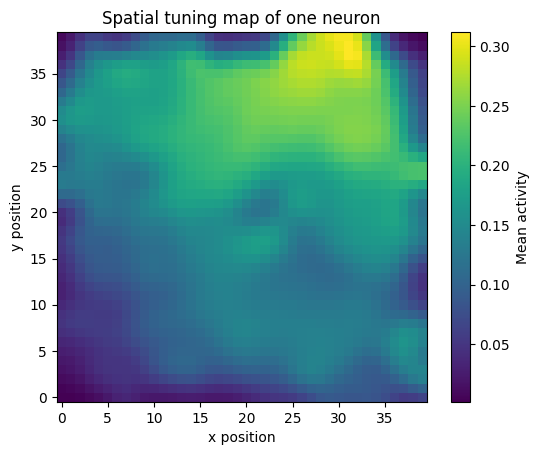

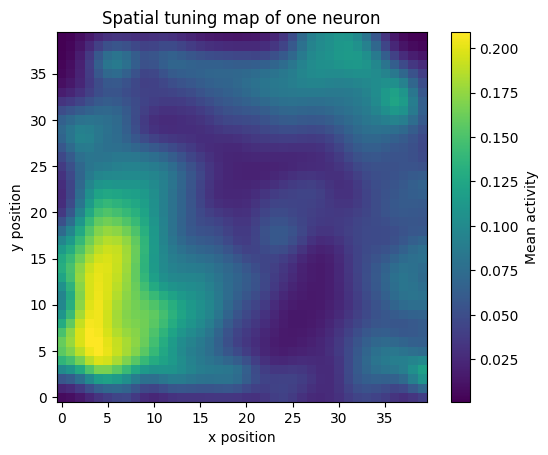

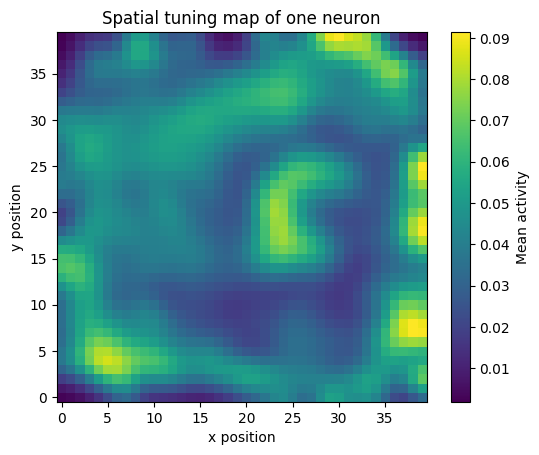

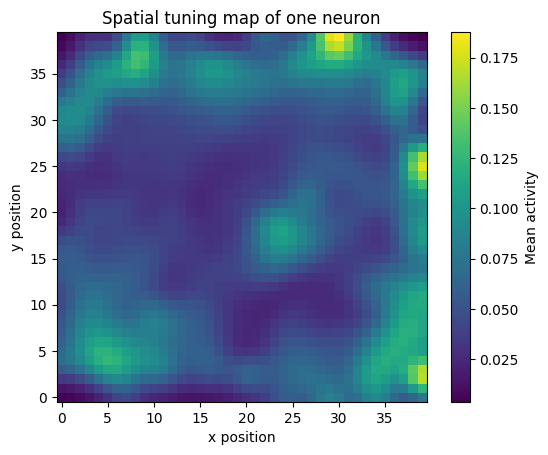

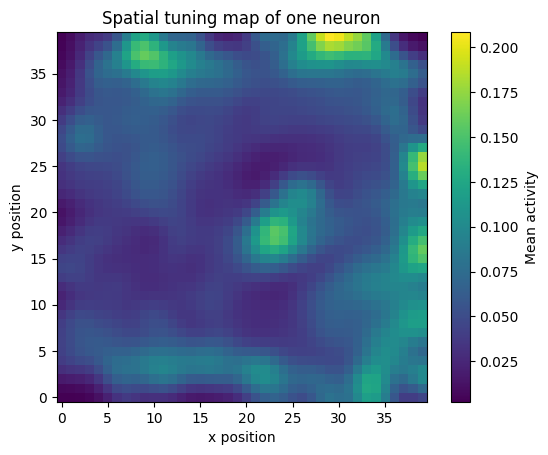

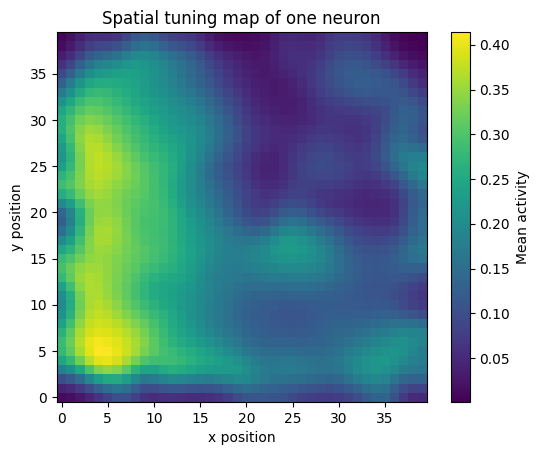

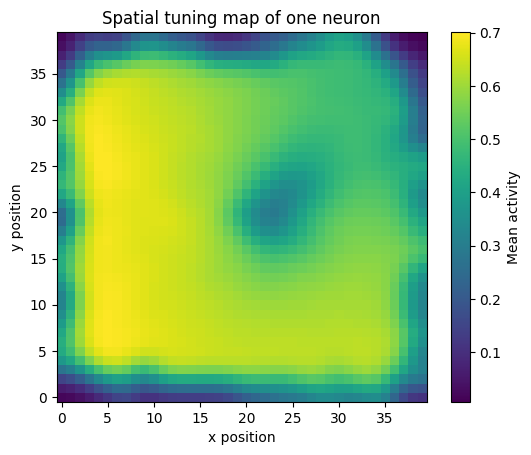

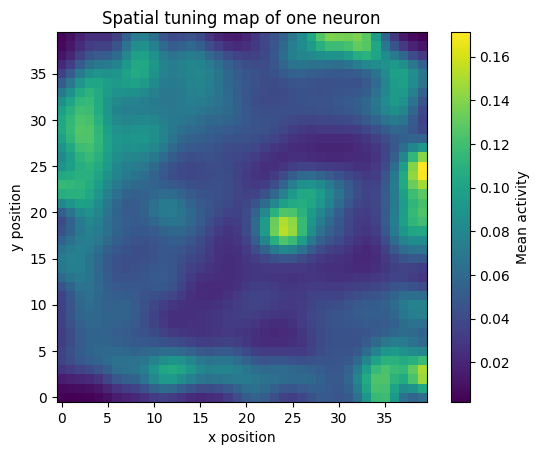

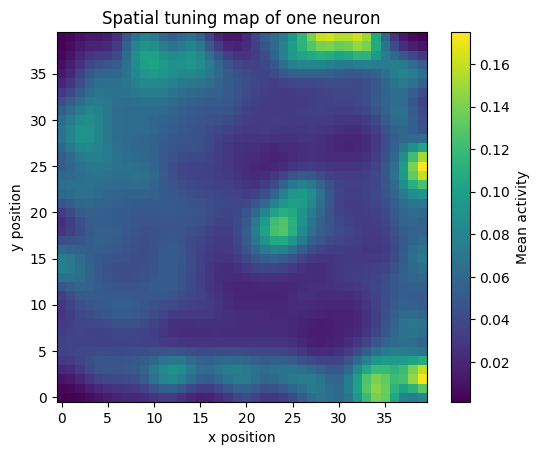

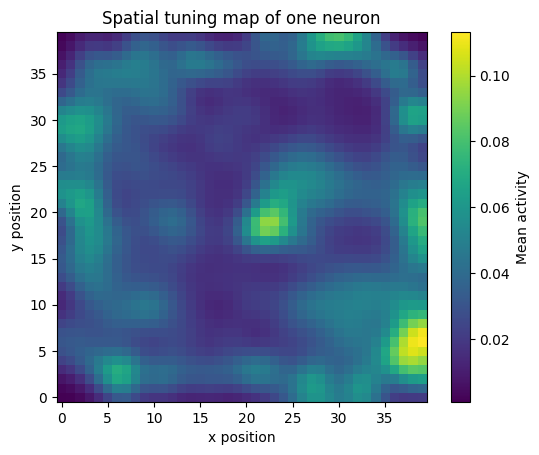

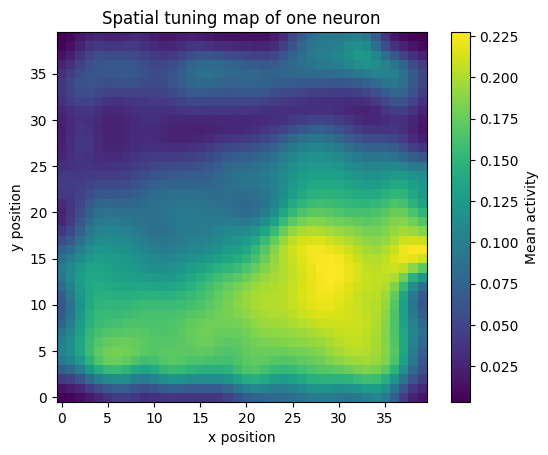

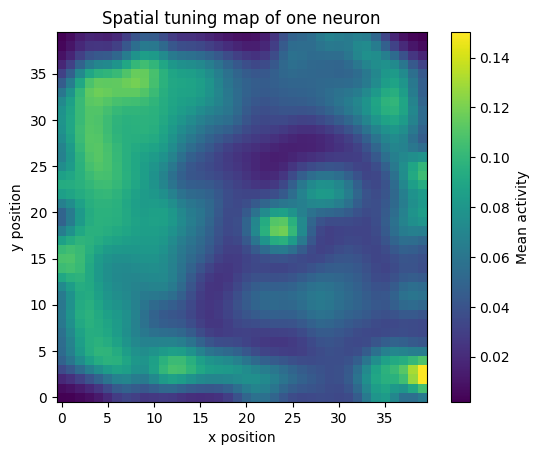

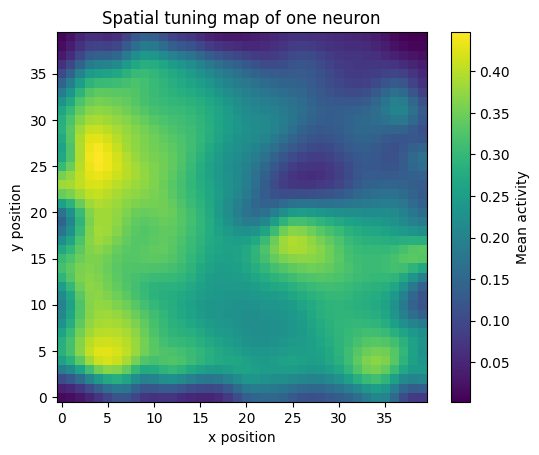

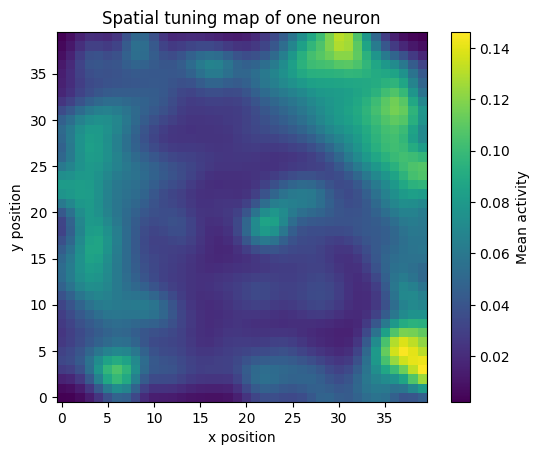

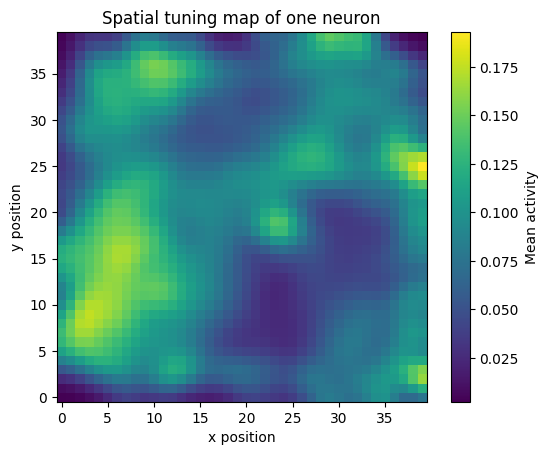

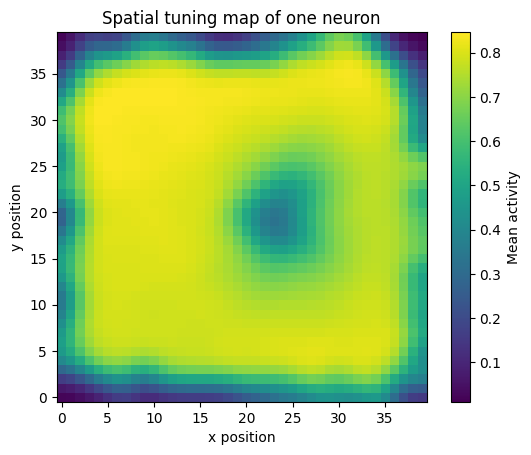

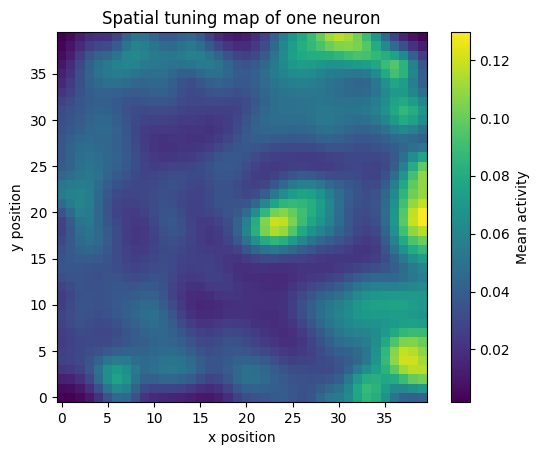

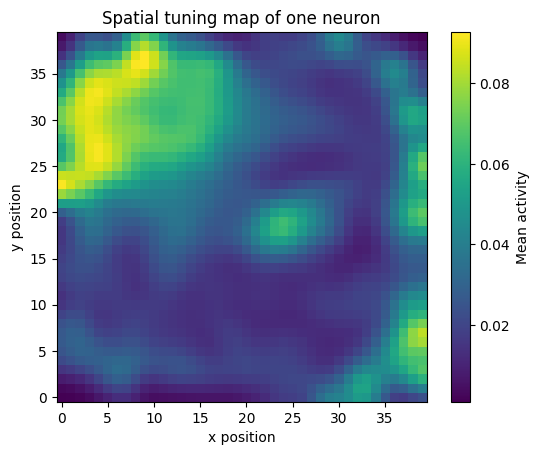

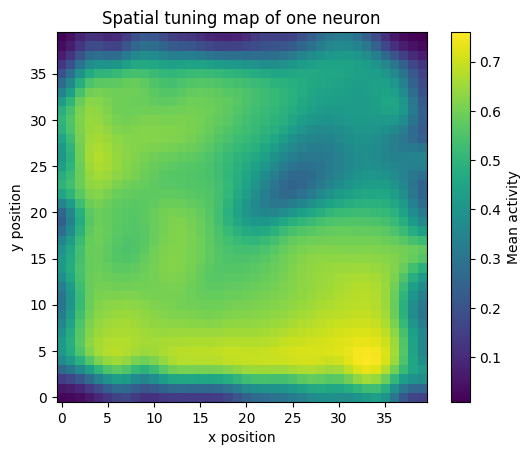

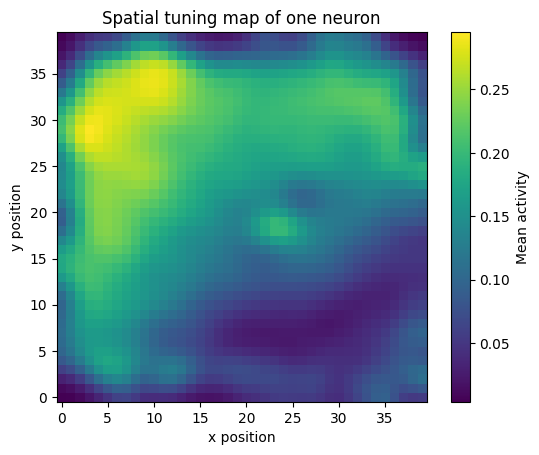

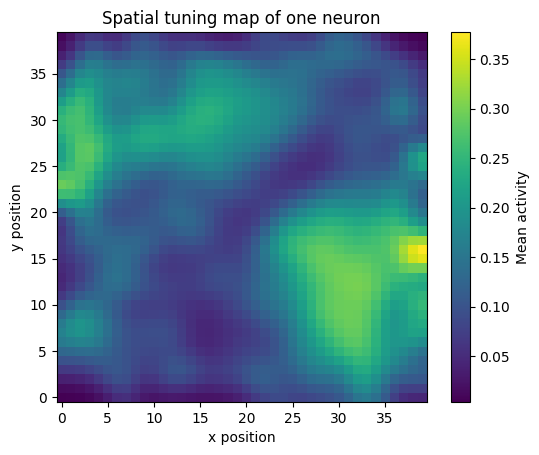

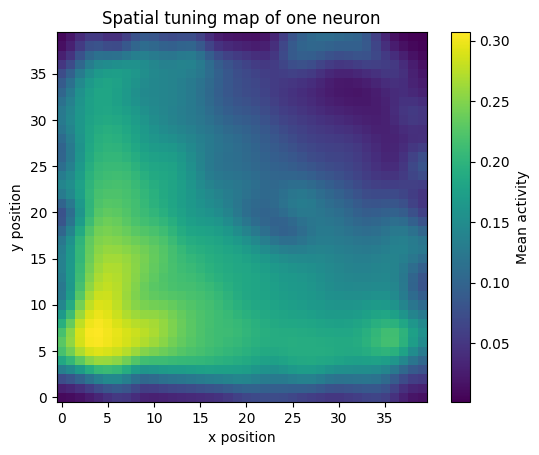

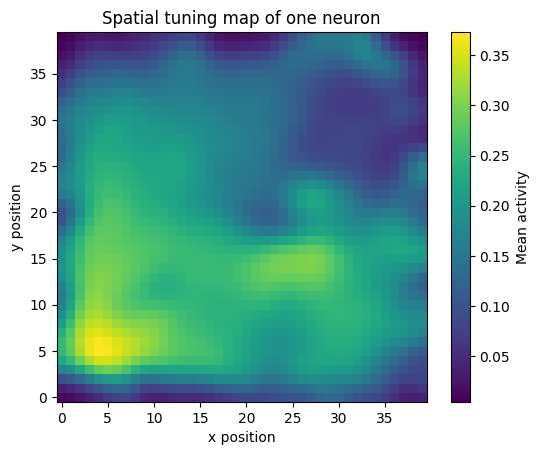

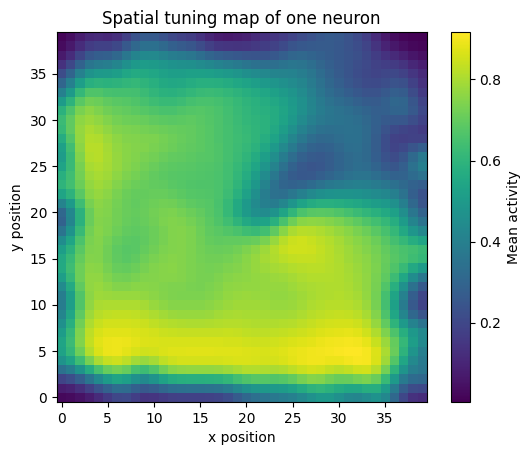

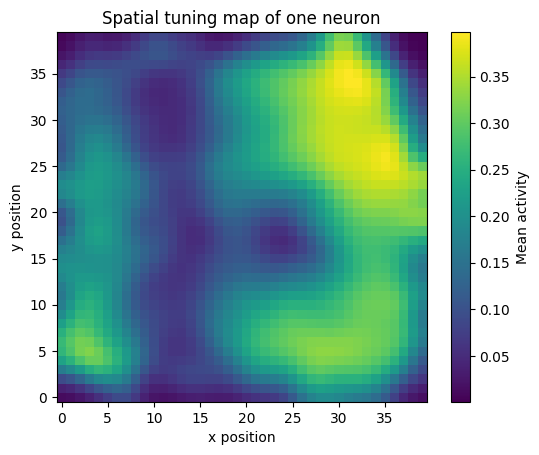

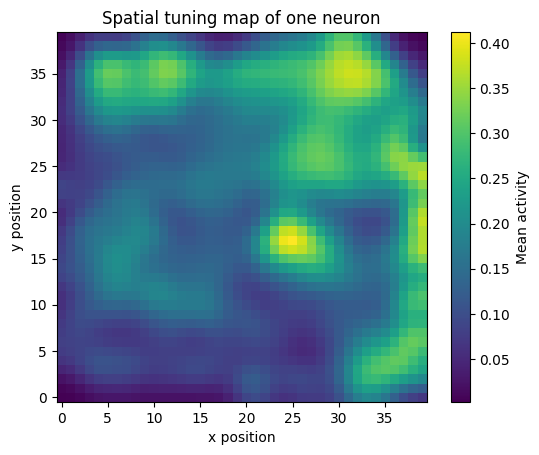

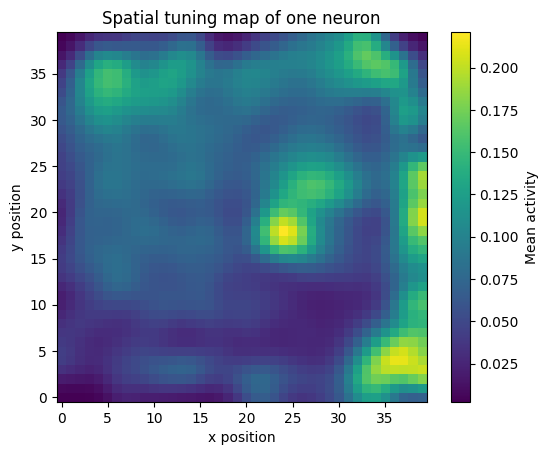

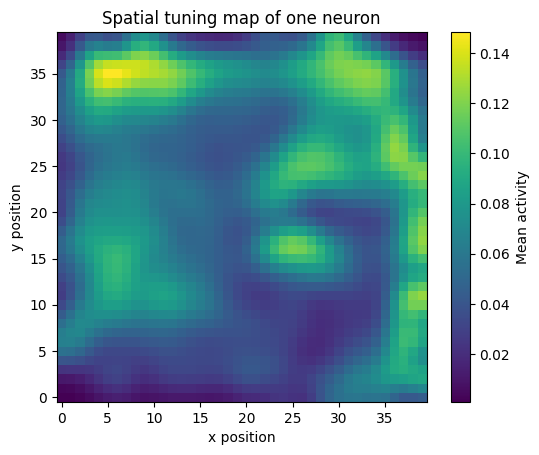

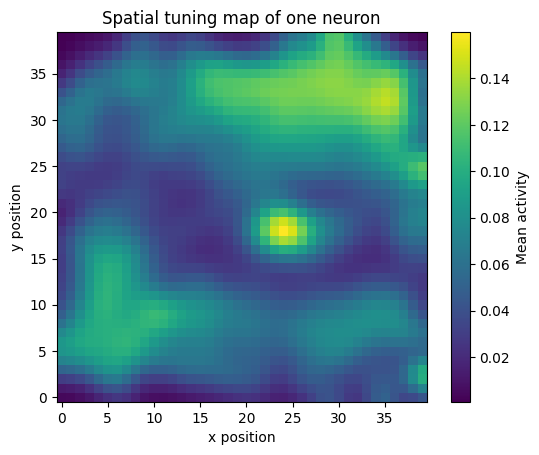

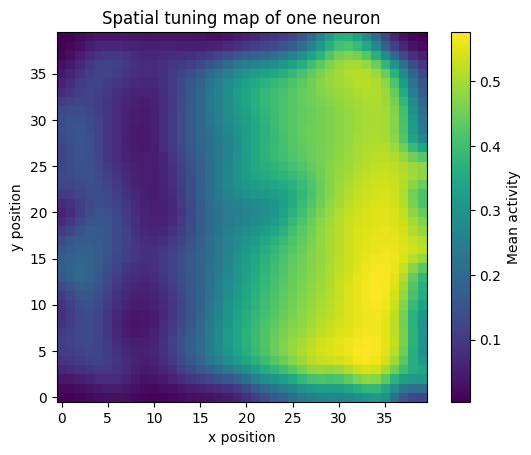

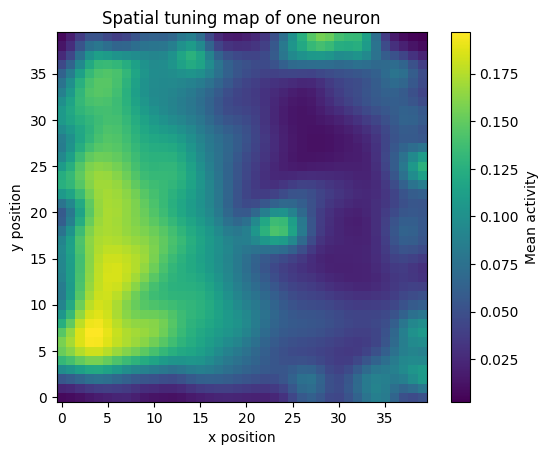

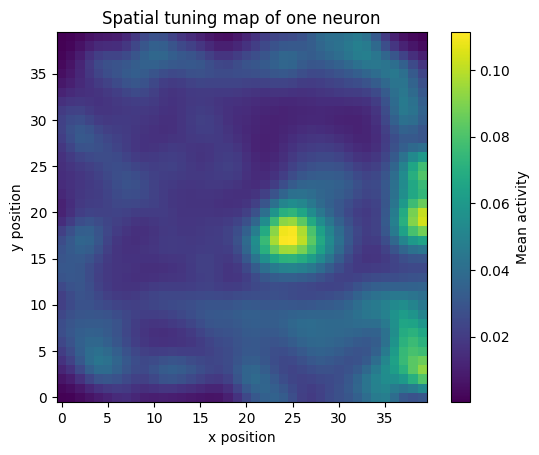

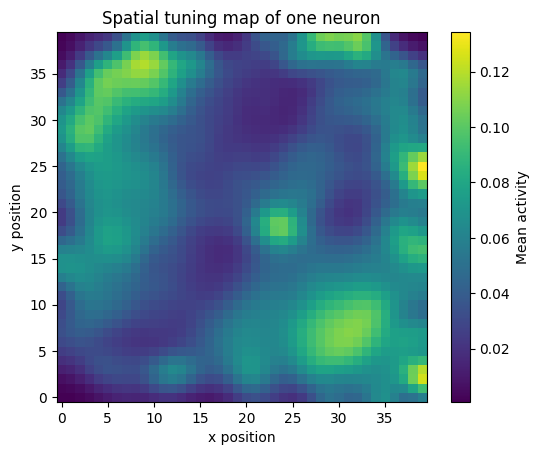

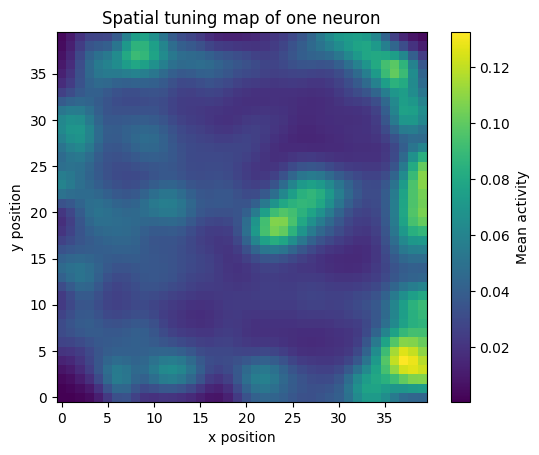

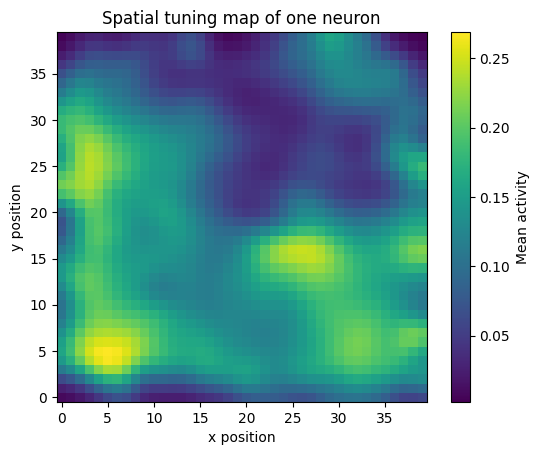

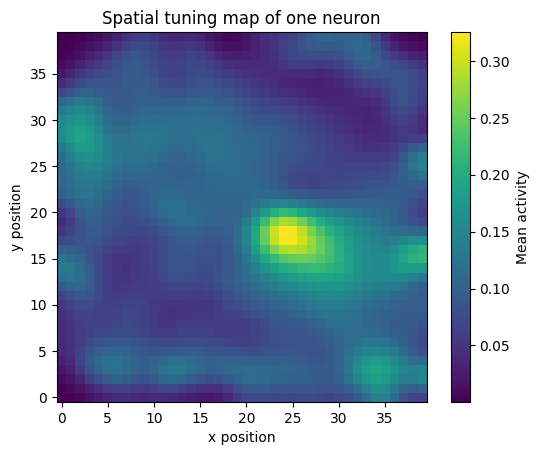

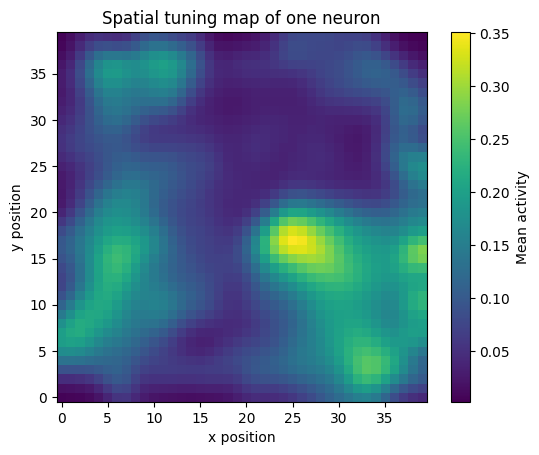

In [3]:
for i in range(visualizer.model.N):
    visualizer.plot_hist(maps[i])